<a href="https://colab.research.google.com/github/ashish-bansod/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



### **Project Type**    - *Regression*
### **Contribution**    - Individual - *Ashish Bansod*


# **Project Summary**

The emergence of bike and scooter ride-sharing companies in urban areas, has created a challenge in accurately predicting the demand for their services. Overestimating or underestimating the demand can lead to resource wastage or revenue loss, respectively. To address this challenge, a project aims to combine historical bike usage patterns with weather data to forecast bike rental demand.

The project utilizes a dataset with input variables: 'Date', 'Seasons', 'Holiday', 'Functional day', 'Temperature', 'Humidity', 'Dew Point Temperature', and 'Windspeed'. Python libraries such as Pandas, Seaborn, NumPy, and scikit-learn (sklearn) are used to develop the prediction algorithm. By evaluating different models, the project seeks to identify algorithms that provide accurate predictions and can be deployed effectively in real-world scenarios.

Accurate bike rental demand forecasting offers significant benefits. Ride-sharing companies can reduce waste and improve resource allocation, resulting in cost savings and increased profitability. By optimizing bike maintenance, parking space allocation, and operational planning based on anticipated demand, these companies can operate more efficiently.

Moreover, accurate demand predictions enhance customer satisfaction and provide a better overall experience for users. By ensuring an adequate supply of bikes and scooters based on anticipated demand, customers are less likely to face unavailability issues. This fosters customer loyalty, positive word-of-mouth, and sustained business growth.

Additionally, bike and scooter ride-sharing services are considered environmentally friendly alternatives to traditional transportation methods. By incorporating weather data into demand forecasting, it becomes possible to align the supply of bikes and scooters with weather conditions suitable for cycling. This encourages more people to choose biking as a means of transportation, resulting in reduced traffic congestion and lower carbon emissions. Accurate demand forecasting contributes to the broader goal of promoting sustainable and eco-friendly urban mobility.

In conclusion, the project's aim to combine historical bike usage patterns with weather data for accurate demand forecasting holds significant potential for the bike and scooter ride-sharing industry. By utilizing advanced algorithms and machine learning techniques, the project seeks to optimize resource allocation, reduce waste, and increase profitability for ride-sharing companies. Simultaneously, it strives to enhance customer satisfaction, promote environmentally friendly transportation alternatives, and mitigate traffic congestion and carbon emissions. Data-driven insights can have a positive impact on both the business and environmental aspects of the bike and scooter ride-sharing industry, leading to a more sustainable and efficient urban mobility landscape.


# **GitHub Link -**

https://github.com/ashish-bansod/Bike_Sharing_Demand_Prediction

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **Data Description**

* **Date** - day/month/year
* **Rented Bike count** - Count of bikes rented per hour
* **Hour** - Hour of the day
* **Temperature**-Temperature in Celsius
* **Humidity** - Humidity in the air in %
* **Windspeed** - Speed of the wind in  m/s
* **Visibility** - Visibility in m (10m)
* **Dew point temperature** - Temperature at the beggining of the day(Celsius)
* **Solar radiation** -Sun contribution (MJ/m2)
* **Rainfall** - Amount of raining in mm
* **Snowfall** - Amount of snowing in cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** -  If the day is a Functioning Day or not

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss

pd.set_option('display.max_column',20)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
bike_df=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin')

### Dataset First View

In [3]:
# Dataset First Look
bike_df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
6626  03/09/2018                321     2             24.3           68   
4749  16/06/2018               2435    21             23.7           64   
4793  18/06/2018               2040    17             29.5           36   
8436  17/11/2018                994    12              9.1           34   
6544  30/08/2018               1142    16             27.6           68   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
6626               1.0              2000                       18.0   
4749               1.7              1707                       16.4   
4793               3.7              1786                       12.8   
8436               1.0              1802                       -5.9   
6544               2.1              1038                       21.1   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
6626                     0.00           0.0            0.0  Autumn   
4749                     0.00           0.0            0.0  Summer   
4793                     1.94           0.0            0.0  Summer   
8436                     1.95           0.0            0.0  Autumn   
6544                     1.46           0.0            0.0  Summer   

         Holiday Functioning Day  
6626  No Holiday             Yes  
4749  No Holiday             Yes  
4793  No Holiday             Yes  
8436  No Holiday             Yes  
6544  No Holiday             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print('Total no. of rows: ' , len(bike_df.index))
print('\n')
print('Total no. of columns: ', len(bike_df.columns))

Total no. of rows:  8760


Total no. of columns:  14


### Dataset Information

In [5]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

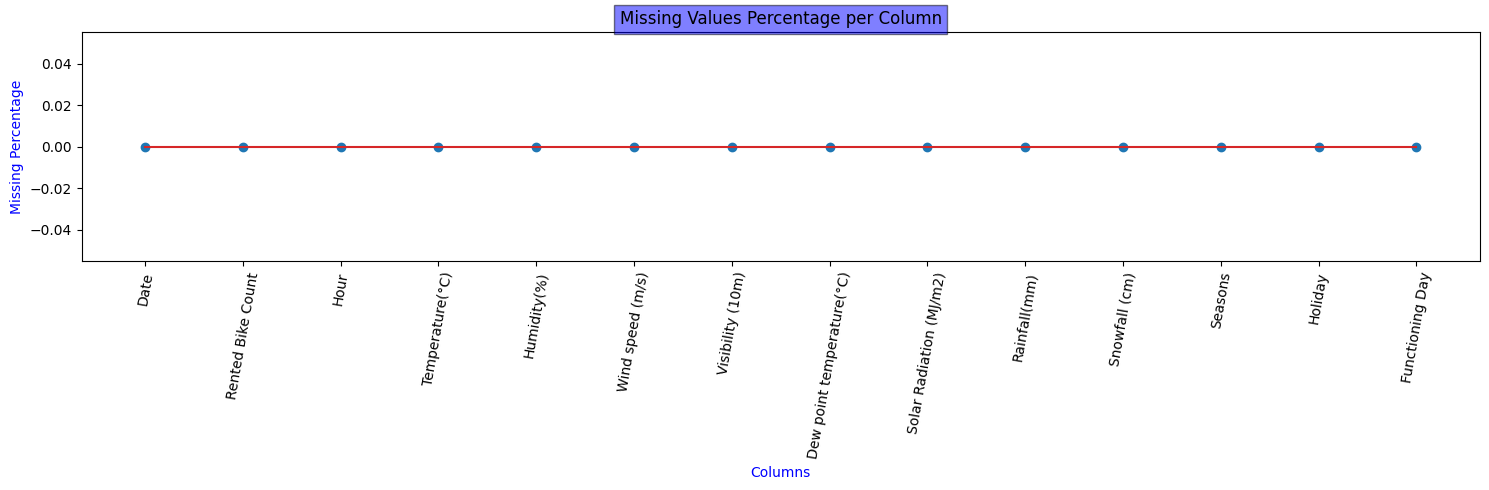

In [8]:
# Visualizing the missing values
missing_values_per = pd.DataFrame((bike_df.isnull().sum() / len(bike_df)) * 100).reset_index()
missing_values_per.columns = ['Column', 'Missing Percentage']

plt.figure(figsize=(15, 5))
plt.stem(missing_values_per['Column'], missing_values_per['Missing Percentage'])
plt.xlabel('Columns',color='blue')
plt.ylabel('Missing Percentage',color='blue')
plt.title('Missing Values Percentage per Column',bbox={'facecolor':'blue', 'alpha':0.5})
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

### What did you know about your dataset?

**There are no missing  and duplicate values present in our Dataset.Our data contains 8760 rows and 14 columns.**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Renaming Columns
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [11]:
# Dataset Describe
bike_df.describe(include='all')

Date  Rented_Bike_Count         Hour  Temperature     Humidity  \
count         8760        8760.000000  8760.000000  8760.000000  8760.000000   
unique         365                NaN          NaN          NaN          NaN   
top     01/12/2017                NaN          NaN          NaN          NaN   
freq            24                NaN          NaN          NaN          NaN   
mean           NaN         704.602055    11.500000    12.882922    58.226256   
std            NaN         644.997468     6.922582    11.944825    20.362413   
min            NaN           0.000000     0.000000   -17.800000     0.000000   
25%            NaN         191.000000     5.750000     3.500000    42.000000   
50%            NaN         504.500000    11.500000    13.700000    57.000000   
75%            NaN        1065.250000    17.250000    22.500000    74.000000   
max            NaN        3556.000000    23.000000    39.400000    98.000000   

         Wind_speed   Visibility  Dew_point_temperature  Solar_Radiation  \
count   8760.000000  8760.000000            8760.000000      8760.000000   
unique          NaN          NaN                    NaN              NaN   
top             NaN          NaN                    NaN              NaN   
freq            NaN          NaN                    NaN              NaN   
mean       1.724909  1436.825799               4.073813         0.569111   
std        1.036300   608.298712              13.060369         0.868746   
min        0.000000    27.000000             -30.600000         0.000000   
25%        0.900000   940.000000              -4.700000         0.000000   
50%        1.500000  1698.000000               5.100000         0.010000   
75%        2.300000  2000.000000              14.800000         0.930000   
max        7.400000  2000.000000              27.200000         3.520000   

           Rainfall     Snowfall Seasons     Holiday Functioning_Day  
count   8760.000000  8760.000000    8760        8760            8760  
unique          NaN          NaN       4           2               2  
top             NaN          NaN  Spring  No Holiday             Yes  
freq            NaN          NaN    2208        8328            8465  
mean       0.148687     0.075068     NaN         NaN             NaN  
std        1.128193     0.436746     NaN         NaN             NaN  
min        0.000000     0.000000     NaN         NaN             NaN  
25%        0.000000     0.000000     NaN         NaN             NaN  
50%        0.000000     0.000000     NaN         NaN             NaN  
75%        0.000000     0.000000     NaN         NaN             NaN  
max       35.000000     8.800000     NaN         NaN             NaN

### Variables Description

* **Date** - day/month/year
* **Rented Bike count** - Count of bikes rented per hour
* **Hour** - Hour of the day
* **Temperature**-Temperature in Celsius
* **Humidity** - Humidity in the air in %
* **Windspeed** - Speed of the wind in  m/s
* **Visibility** - Visibility in m (10m)
* **Dew point temperature** - Temperature at the beggining of the day(Celsius)
* **Solar radiation** -Sun contribution (MJ/m2)
* **Rainfall** - Amount of raining in mm
* **Snowfall** - Amount of snowing in cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** -  If the day is a Functioning Day or not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

unique_values_per_variable = bike_df.apply(lambda column: column.unique())
print(unique_values_per_variable)

Date                     [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented_Bike_Count        [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity                 [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind_speed               [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility               [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew_point_temperature    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar_Radiation          [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall                 [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                   [Winter, Spring, Summer, Autumn]
Holiday                                              [No Holiday, Holiday]
Functioning_Day          

In [13]:
# Number of Unique values in each columns

bike_df.nunique().sort_values(ascending=False)

Rented_Bike_Count        2166
Visibility               1789
Dew_point_temperature     556
Temperature               546
Date                      365
Solar_Radiation           345
Humidity                   90
Wind_speed                 65
Rainfall                   61
Snowfall                   51
Hour                       24
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

In [15]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [16]:
# convert data type of 'Date' column to Datetime format
bike_df['Date'].dtype

dtype('O')

In [17]:
bike_df['Date']=bike_df['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

In [18]:
bike_df['Date'].dtype

dtype('<M8[ns]')

In [19]:
# Extracting: 'day' , 'month' and  'year'  from 'Date' column:
bike_df['day']=bike_df['Date'].dt.day_name()
bike_df['month']=bike_df['Date'].dt.month
bike_df['year']=bike_df['Date'].dt.year

In [20]:
bike_df.sample(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
7689 2018-10-17               1200     9         11.2        63         1.1   
2938 2018-04-02                579    10         17.5        66         1.3   
2277 2018-03-05                533    21          3.1        59         1.5   
1658 2018-02-08                103     2         -8.3        65         0.4   
5846 2018-08-01                475    14         38.7        38         2.4   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
7689         656                    4.4             0.88       0.0       0.0   
2938        1059                   11.0             0.55       0.0       0.0   
2277        2000                   -4.1             0.00       0.0       0.0   
1658        1750                  -13.7             0.00       0.0       0.0   
5846        1943                   21.8             3.12       0.0       0.0   

     Seasons     Holiday Functioning_Day        day  month  year  
7689  Autumn  No Holiday             Yes  Wednesday     10  2018  
2938  Spring  No Holiday             Yes     Monday      4  2018  
2277  Spring  No Holiday             Yes     Monday      3  2018  
1658  Winter  No Holiday             Yes   Thursday      2  2018  
5846  Summer  No Holiday             Yes  Wednesday      8  2018

In [21]:
bike_df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [22]:
# Creating new column named: 'weekend'
bike_df['weekend']=bike_df['day'].apply(lambda x: 1 if x== 'Saturday' or x== 'Sunday' else 0)

In [23]:
bike_df['weekend'].value_counts()

0    6264
1    2496
Name: weekend, dtype: int64

In [24]:
# Drop columns: 'Date', 'day' and 'year'
bike_df.drop([ 'Date','day','year'],axis=1,inplace=True)

In [25]:
bike_df.sample(3)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
5443               1847    19         31.2        62         2.1        1852   
194                 237     2         -4.7        50         0.7        1983   
3944               1997     8         13.8        79         0.9         313   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
5443                   23.0             0.63       0.0       0.0  Summer   
194                   -13.5             0.00       0.0       0.0  Winter   
3944                   10.2             0.44       0.0       0.0  Spring   

         Holiday Functioning_Day  month  weekend  
5443  No Holiday             Yes      7        1  
194   No Holiday             Yes     12        1  
3944  No Holiday             Yes      5        0

### What all manipulations have you done and insights you found?

###***The "Date" column, initially read as a string by Python, is essential for analyzing user behavior. To enable precise analysis, it is necessary to convert the column into a datetime format. Once converted, it can be separated into three separate columns: "year," "month," and "day." These columns represent distinct temporal components and allow for more efficient categorization and analysis of the data, providing valuable insights into user behavior patterns.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***UNIVARIATE ANALYSIS***

#### Chart - 1

In [26]:
# Chart - 1 visualization code
bike_df['Rented_Bike_Count'].value_counts().sort_values(ascending=False)

0       295
223      19
262      19
122      19
165      18
       ... 
2443      1
3146      1
1699      1
2003      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

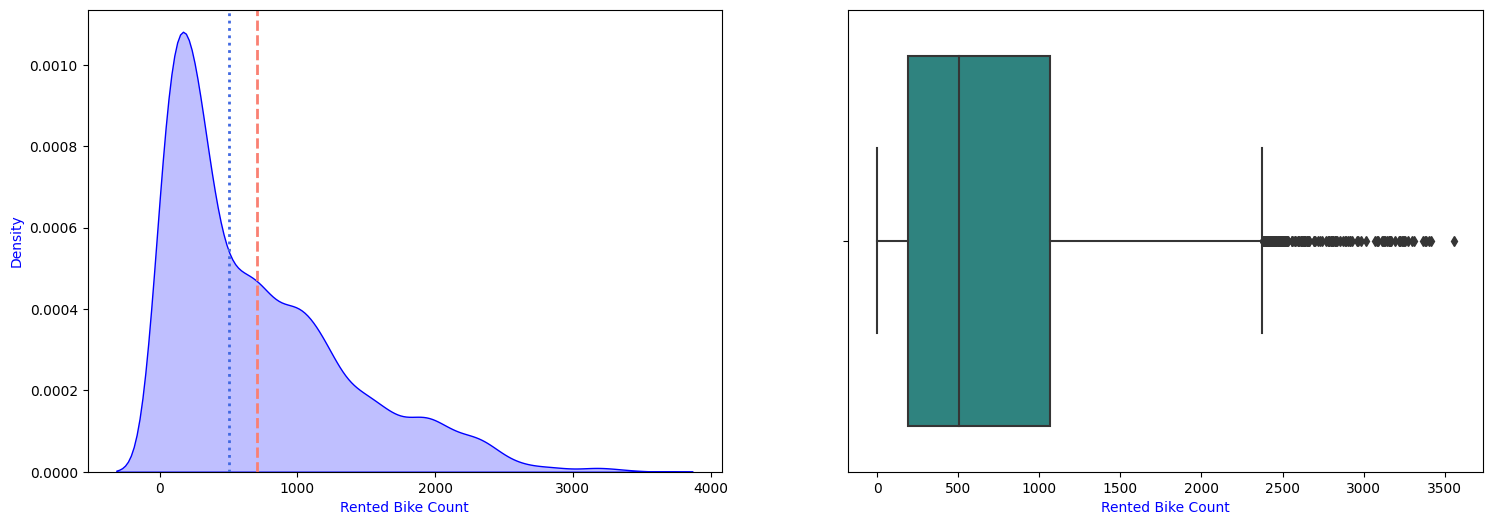

In [27]:
# Chart - 1 : Distribution of Dependent variable

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
sns.kdeplot(bike_df,x='Rented_Bike_Count',fill=True,color='b',ax=ax1)
ax1.axvline(bike_df['Rented_Bike_Count'].mean(), color='salmon', linestyle='dashed', linewidth=2)
ax1.axvline(bike_df['Rented_Bike_Count'].median(), color='royalblue', linestyle=':', linewidth=2)
sns.boxplot(bike_df,x='Rented_Bike_Count',ax=ax2,palette="viridis")
ax1.set_xlabel('Rented Bike Count', color='blue')
ax1.set_ylabel('Density', color='blue')

ax2.set_xlabel('Rented Bike Count', color='blue')
plt.show()

#####  What is/are the insight(s) found from the chart?

**The dependent variable is positively skewed and have lot more outliers**

#####  Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The gained insights from analyzing data with a positively skewed dependent variable (Bike rented count) and a high number of outliers can potentially create a positive business impact. However, the presence of outliers suggests instances where there are extremely high bike rental counts, which may indicate exceptional demand spikes or anomalies. While this may not directly lead to negative growth, it can pose challenges in capacity planning, resource allocation, and service delivery, requiring businesses to carefully manage and optimize operations to meet customer demand and prevent potential negative impacts on customer satisfaction and business growth.**

#### Chart - 2

In [28]:
# Chart - 2 visualization code
num_features=bike_df.drop('Rented_Bike_Count',axis=1).describe().columns
num_features

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'month', 'weekend'],
      dtype='object')

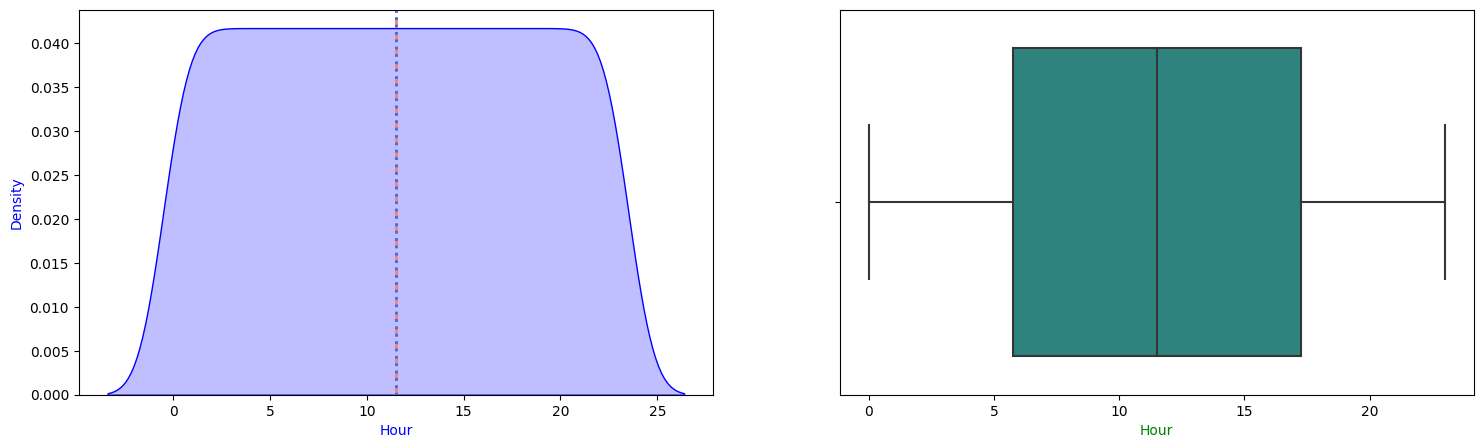

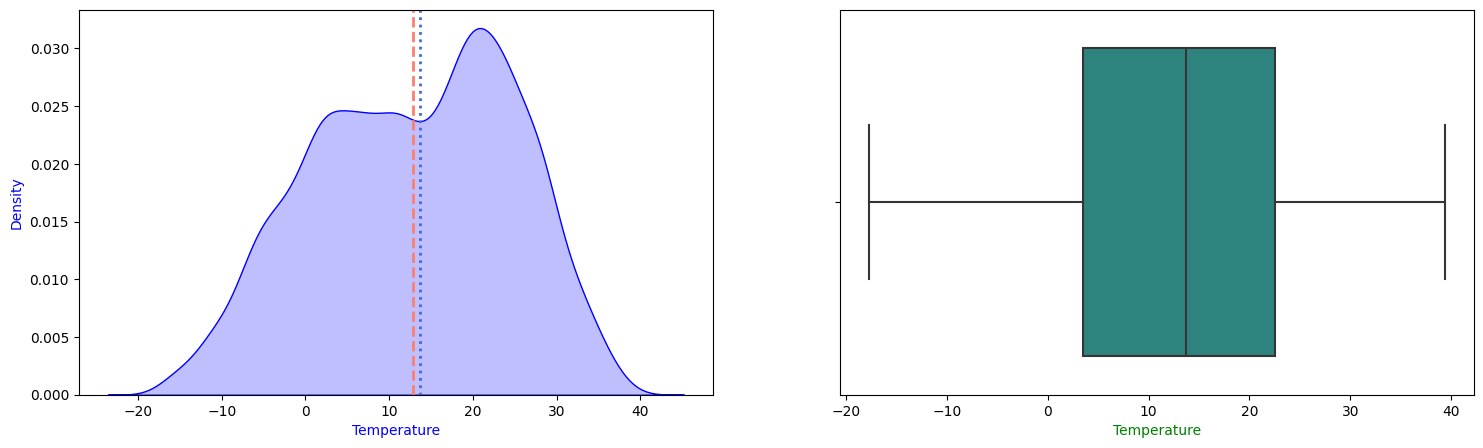

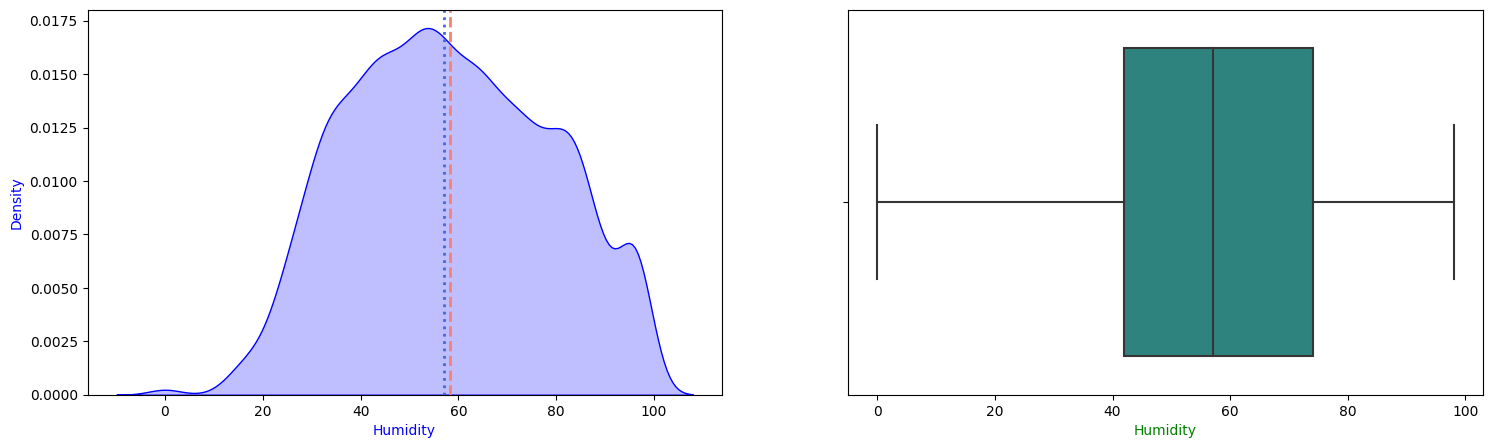

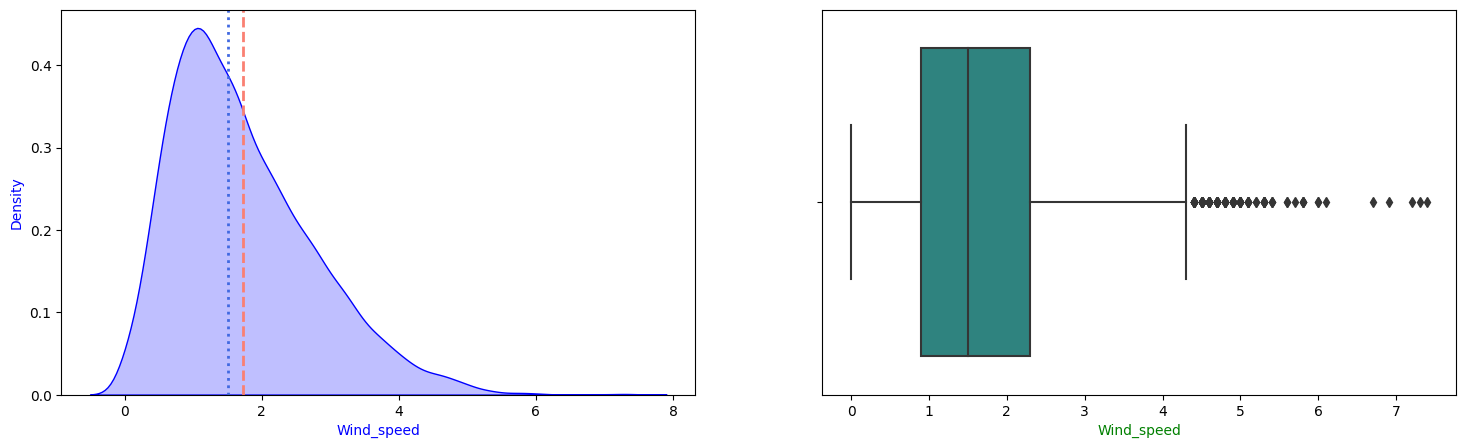

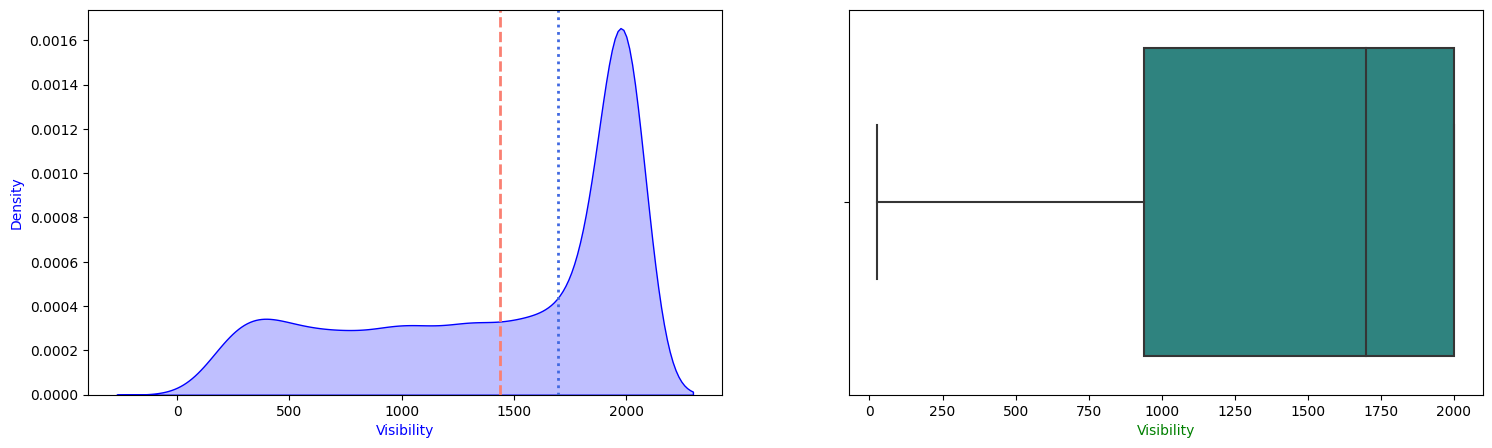

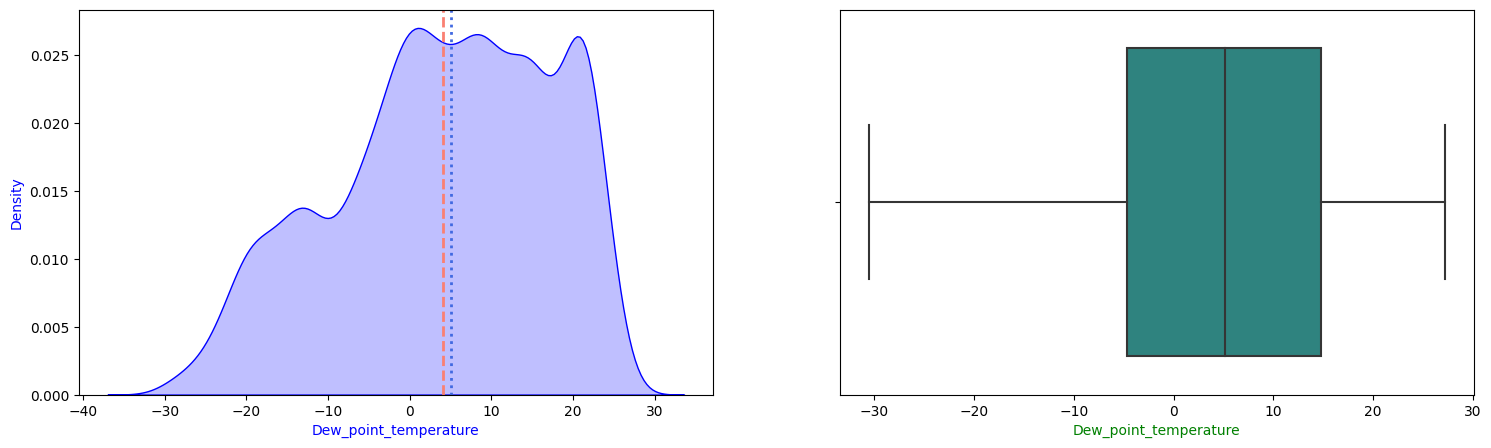

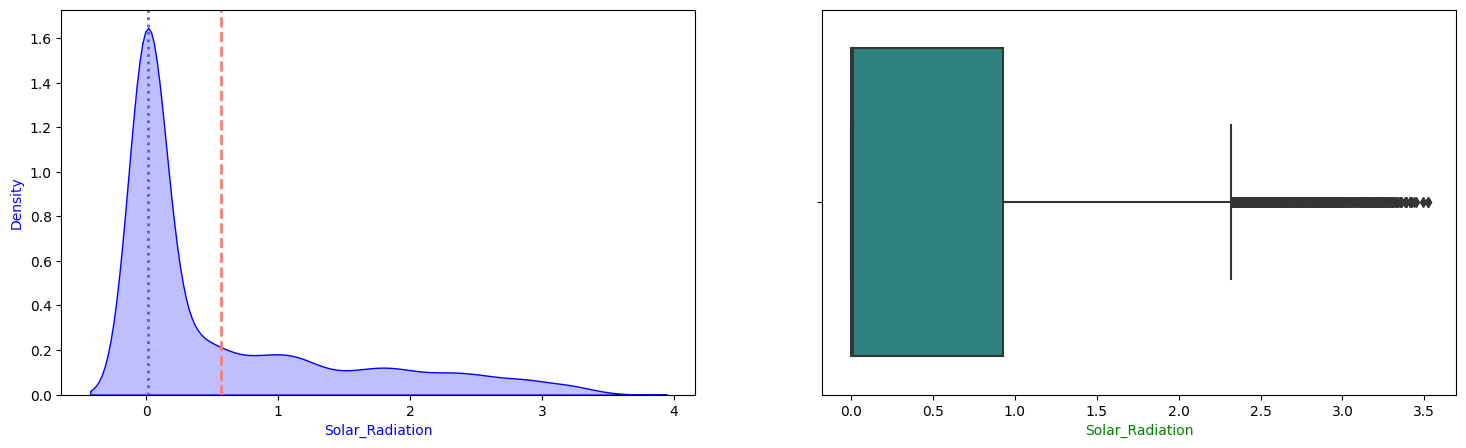

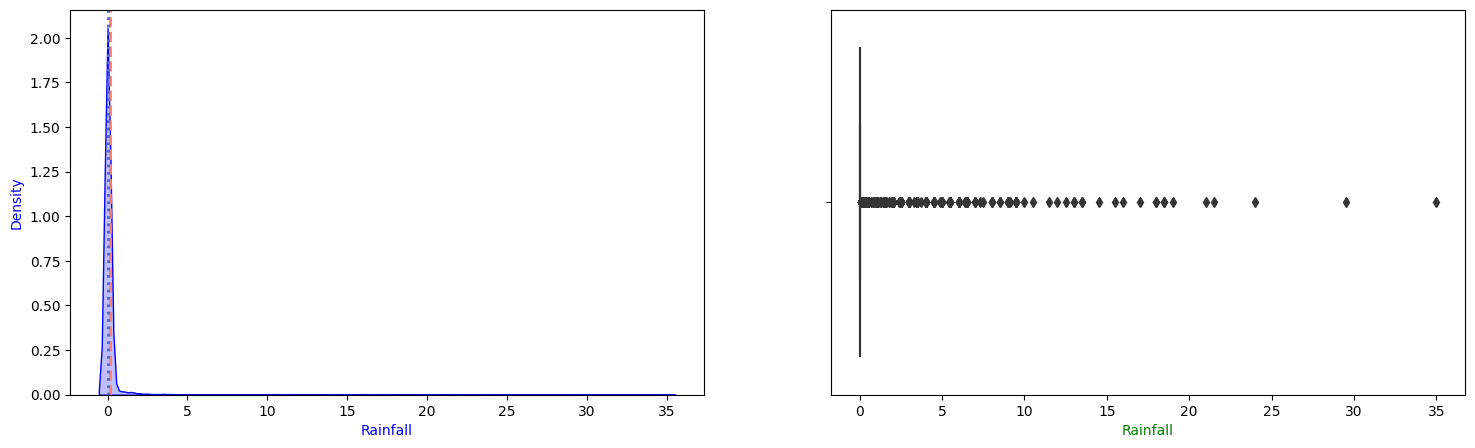

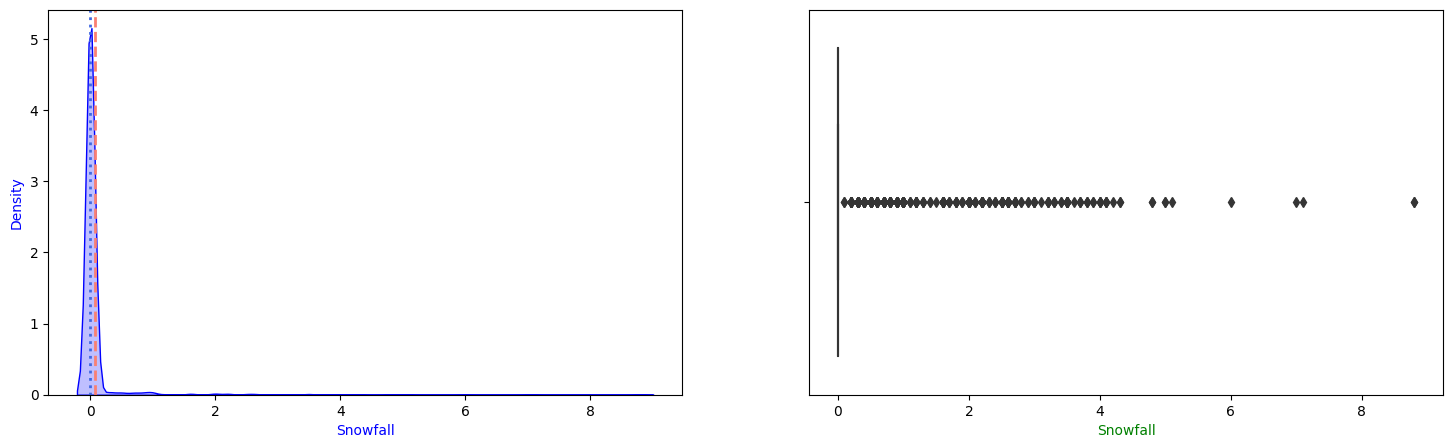

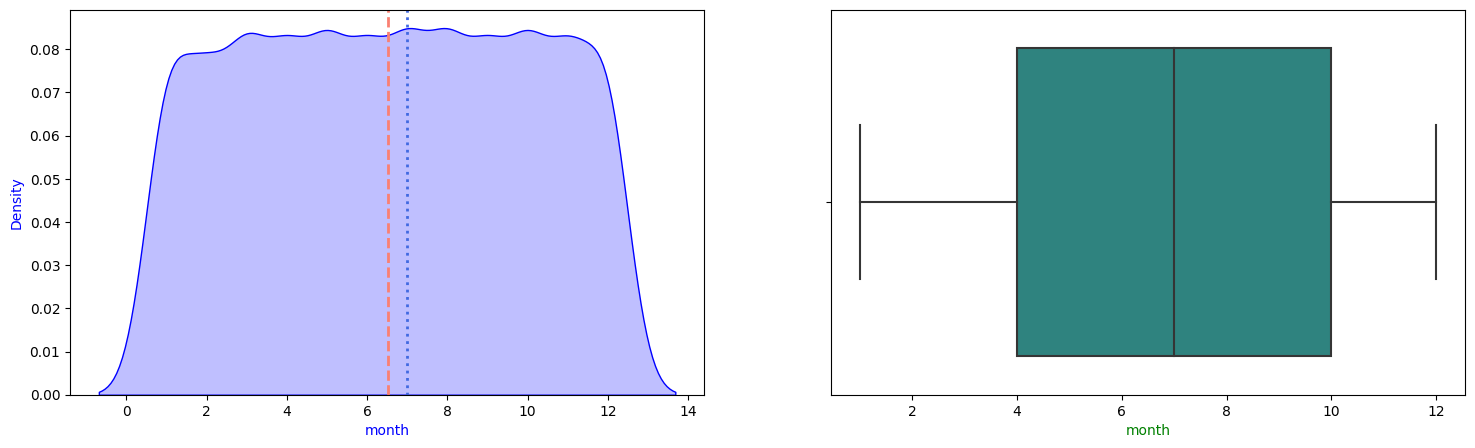

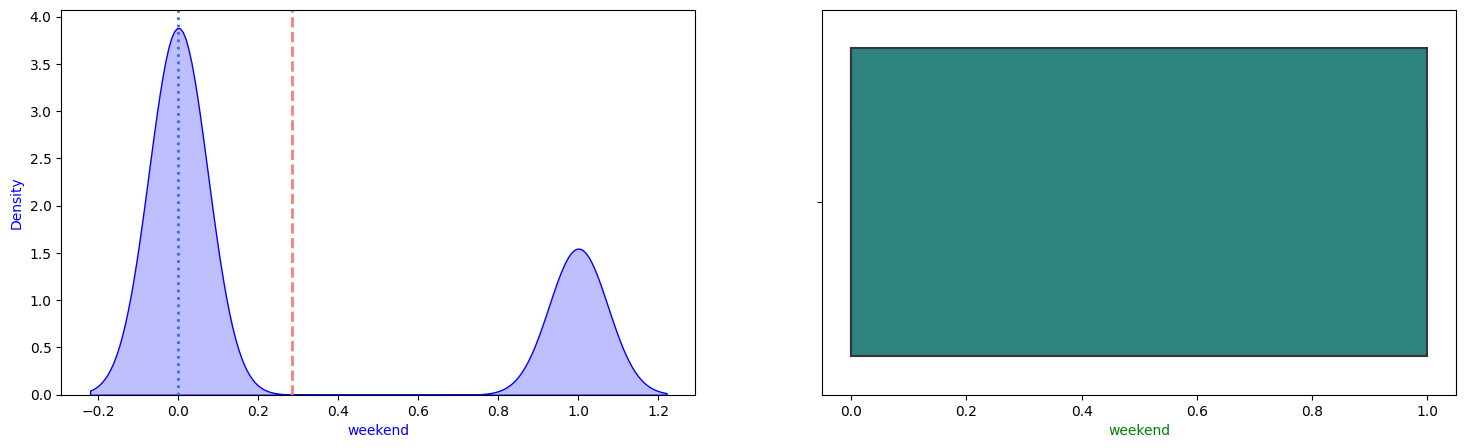

In [29]:
# Chart - 2 : Distribution of Numerical Features
for var in num_features:
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
  sns.kdeplot(bike_df,x=var,fill=True,ax=ax1,color='b')
  ax1.axvline(bike_df[var].mean(),color='salmon', linestyle='dashed', linewidth=2)
  ax1.axvline(bike_df[var].median(),color='royalblue', linestyle=':', linewidth=2)
  sns.boxplot(bike_df,x=var,ax=ax2,palette="viridis")

  ax1.set_xlabel(f'{var}', color='blue')
  ax1.set_ylabel('Density', color='blue')

  ax2.set_xlabel(var, color='green')

  plt.show()
  print('\n\n')


#####  What is/are the insight(s) found from the chart?

**Our numerical features exhibit skewness and some of them contains outliers.**

#####  Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights from careful analysis and appropriate handling of skewness and outliers can help create a positive business impact. By accurately understanding and addressing these data characteristics, businesses can make informed decisions, develop effective strategies, and optimize their operations. This can lead to improved resource allocation, targeted marketing, enhanced customer satisfaction, and overall positive growth and performance in the business.**

#### Chart - 3

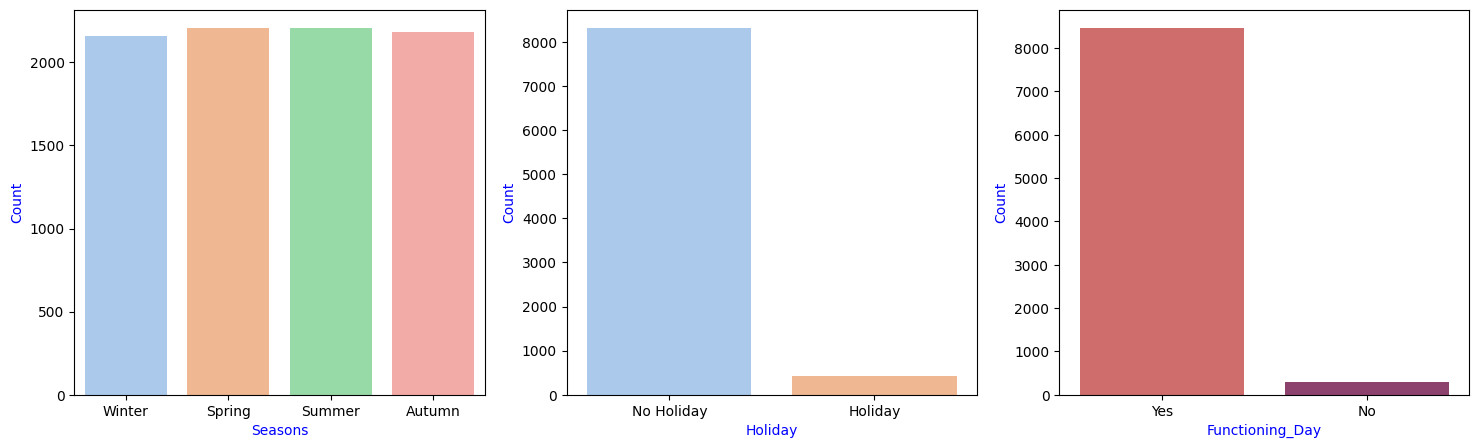

In [30]:
# Chart - 3 : Plotting graph for categorical features

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.countplot(bike_df,x='Seasons',ax=ax1,palette='pastel')
sns.countplot(bike_df,x='Holiday',ax=ax2,palette='pastel')
sns.countplot(bike_df,x='Functioning_Day',ax=ax3,palette='flare')

ax1.set_xlabel('Seasons', color='blue')
ax1.set_ylabel('Count', color='blue')

ax2.set_xlabel('Holiday', color='blue')
ax2.set_ylabel('Count', color='blue')

ax3.set_xlabel('Functioning_Day', color='blue')
ax3.set_ylabel('Count', color='blue')

plt.show()


##### 1. Why did you pick the specific chart?

**Show Categorical Features**

##### 2. What is/are the insight(s) found from the chart?

**There is not much difference across seasons but the count of Rental bikes significantly imbalance across 'Holiday' and 'Functioning Day' columns.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Analyzing the rental bike patterns across seasons, holidays, and functional days provides valuable insights for understanding the fluctuation in demand and optimizing resource allocation accordingly.**

## ***BIVARIATE ANALYSIS***

#### Chart - 4

In [31]:
# Chart - 4 visualization code
num_features

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'month', 'weekend'],
      dtype='object')

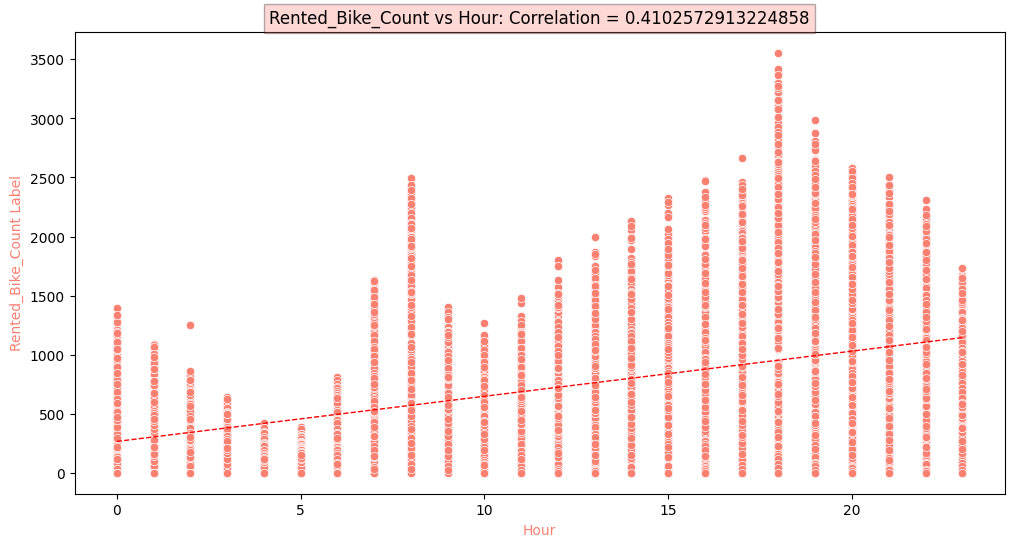

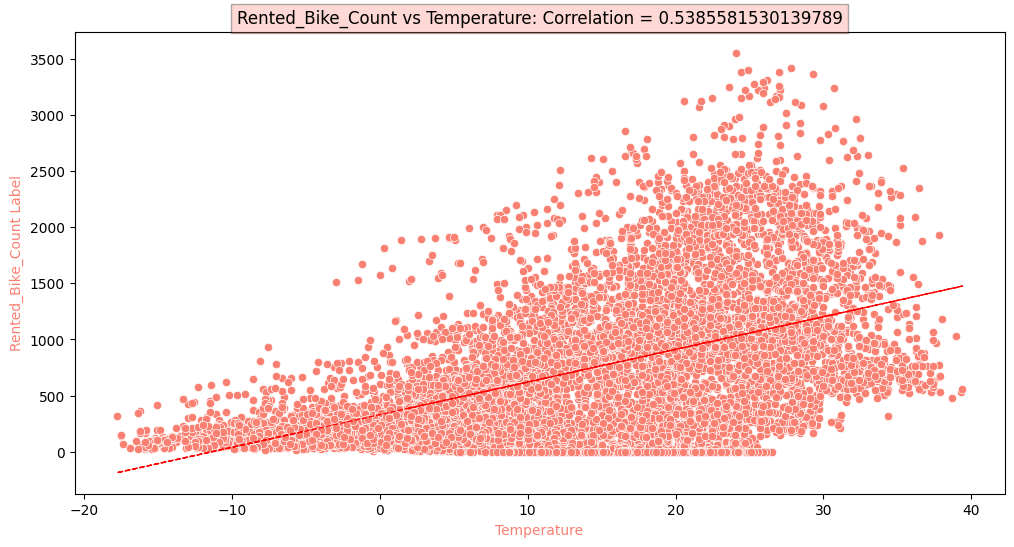

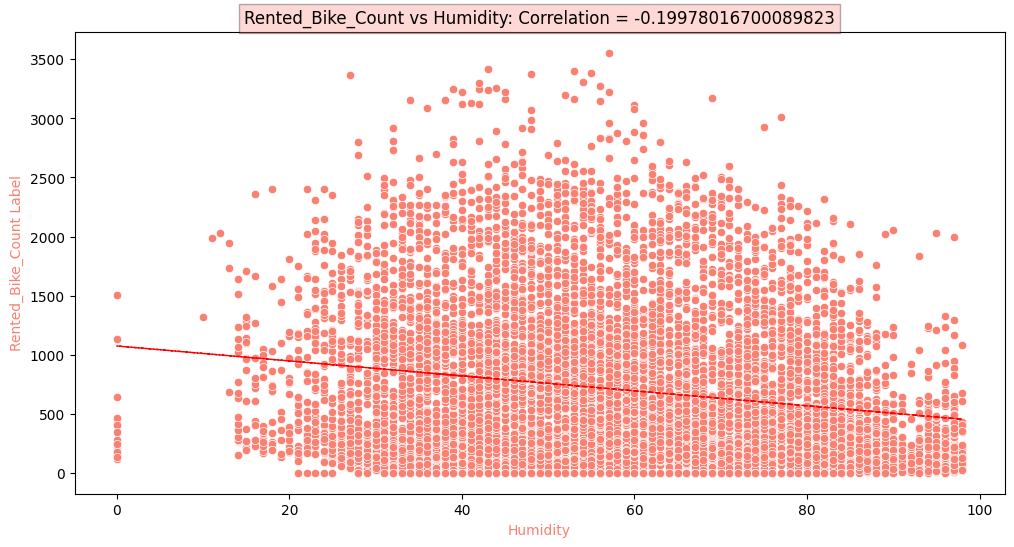

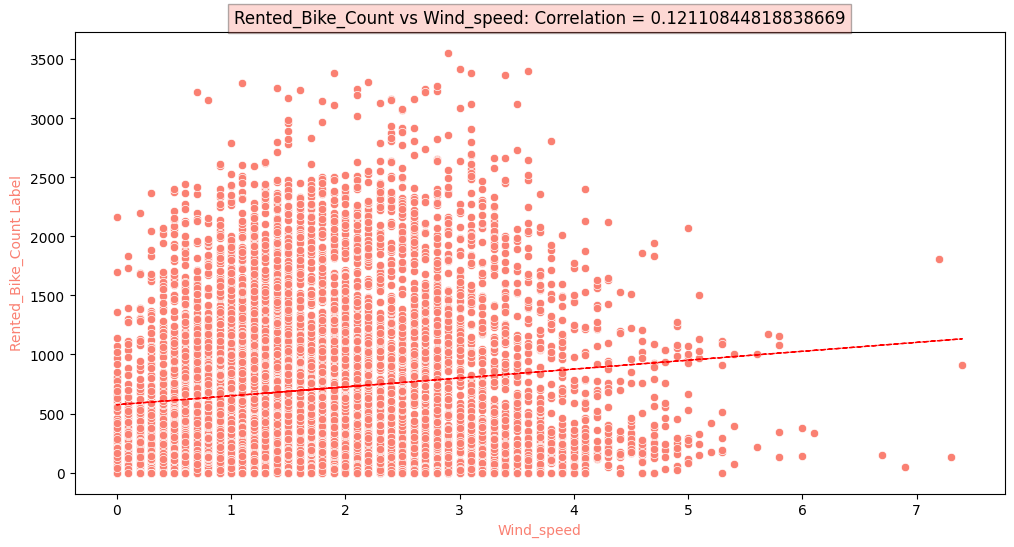

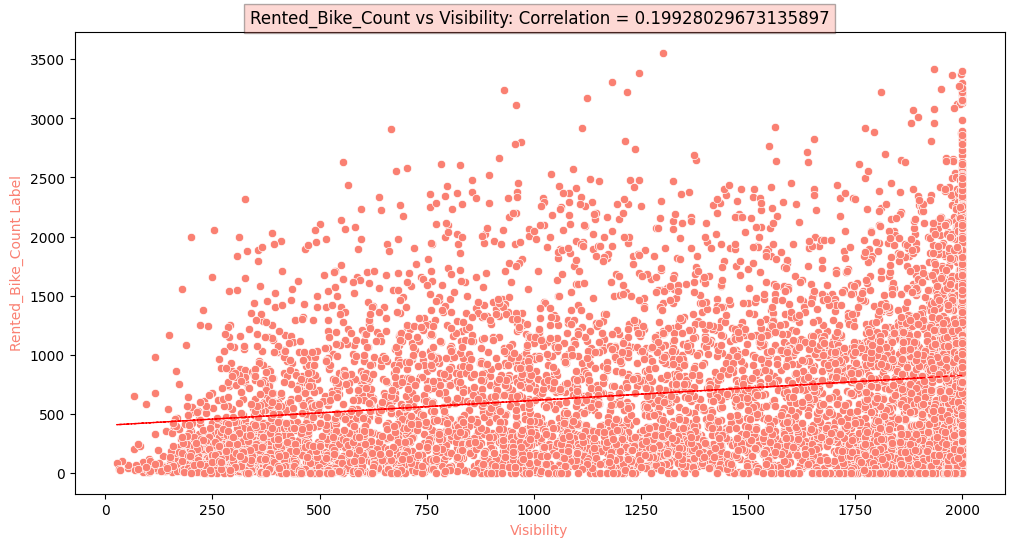

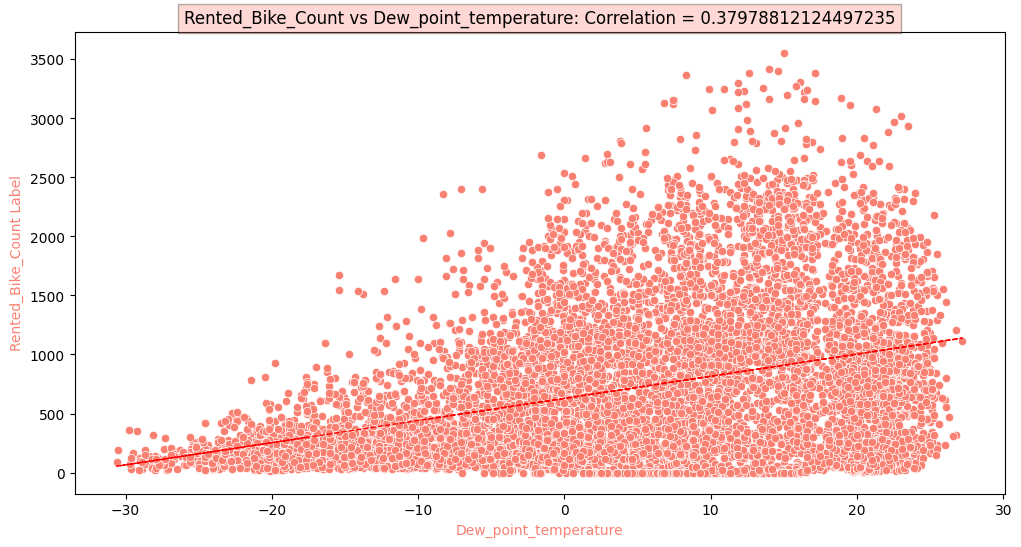

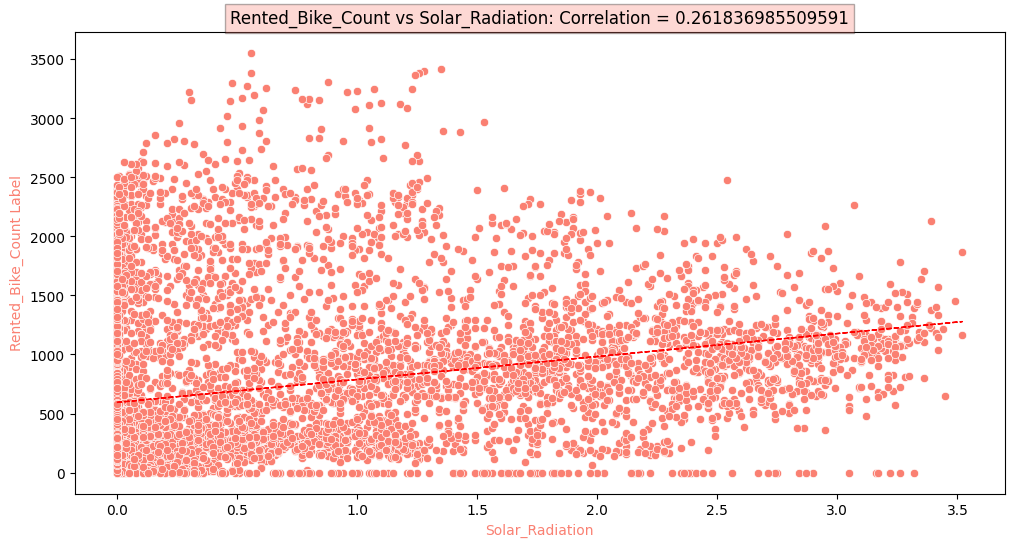

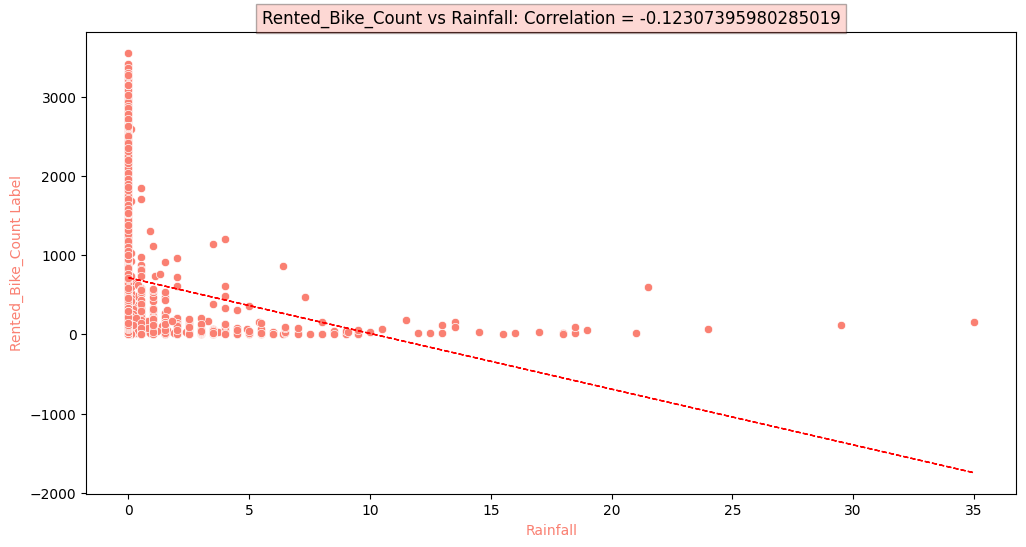

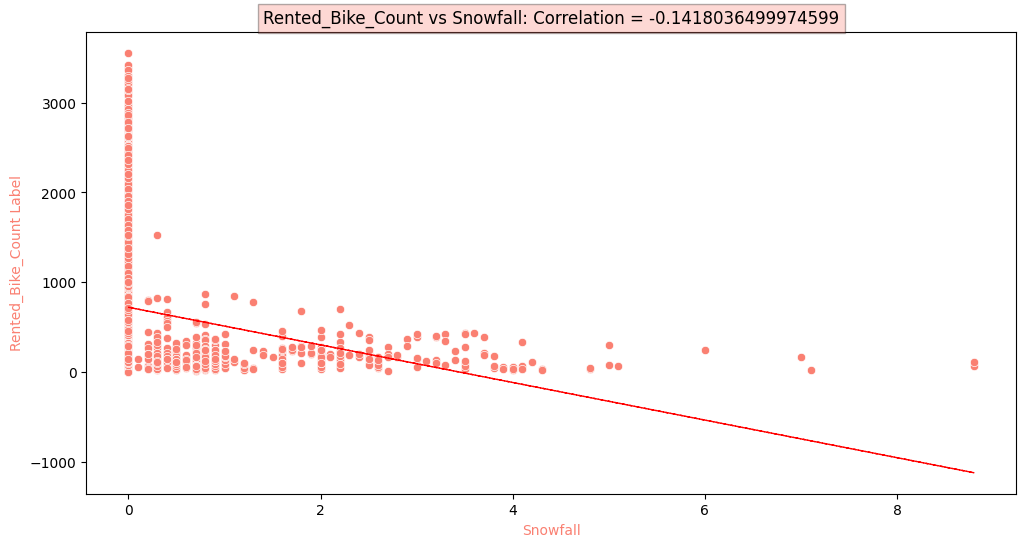

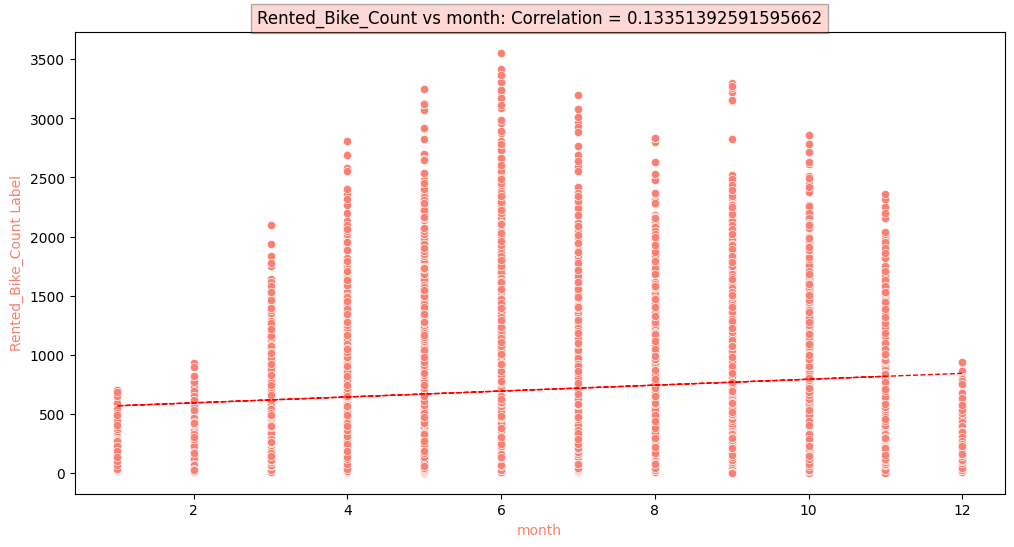

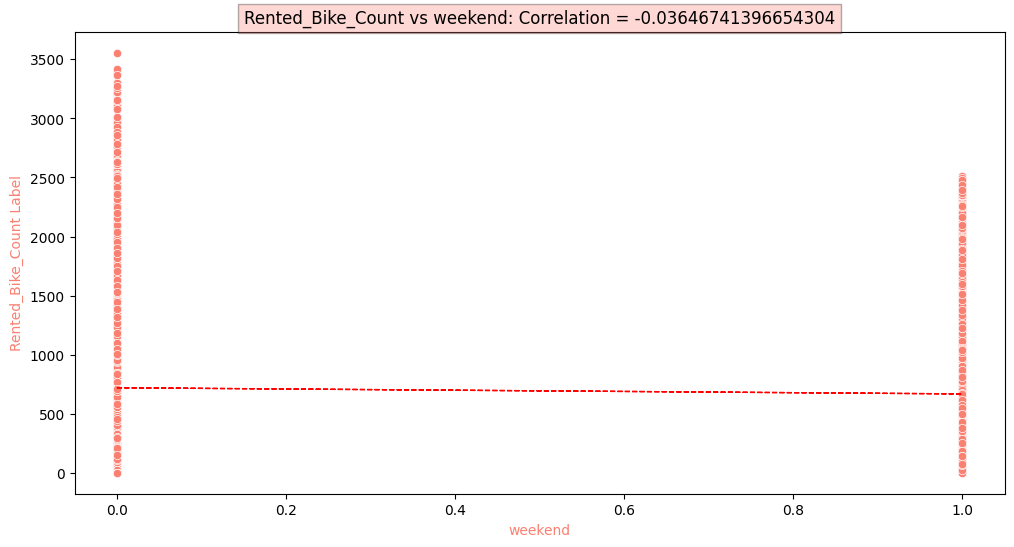

In [32]:
for var in num_features:
  plt.figure(figsize=(12,6))
  sns.scatterplot(bike_df,x=var,y='Rented_Bike_Count',color='salmon')
  correlation=bike_df[var].corr(bike_df['Rented_Bike_Count'])
  plt.title('Rented_Bike_Count vs ' + var + ': Correlation = '+str(correlation),bbox={'facecolor':'salmon', 'alpha':0.3} )
  z = np.polyfit(bike_df[var], bike_df['Rented_Bike_Count'], 1)
  y_hat = np.poly1d(z)(bike_df[var])
  plt.plot(bike_df[var], y_hat,'r--', lw=1)

  plt.xlabel(var , color='salmon')
  plt.ylabel('Rented_Bike_Count Label', color='salmon')

  plt.show()
  print('\n\n\n')

##### 1. Why did you pick the specific chart?

**Show The Relation between  Numerical Features and dependent variable**

##### 2. What is/are the insight(s) found from the chart?

**Hour, Temperature, wind speed, visibility, dew point temperature,solar radiation & month are positively correlated with our dependent variable (Rented Bike Count) while other numerical features are negatively correlated with Rented bike count.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights indicating positive correlations between Hour, Temperature, wind speed, visibility, dew point temperature, solar radiation, and month with the Rented Bike Count can inform business decisions such as optimizing operational hours, adjusting pricing, and targeting marketing efforts to maximize bike rentals and drive positive business impact. Additionally, understanding the negative correlations with other numerical features can help identify areas for improvement and implement strategies to mitigate potential negative impacts on bike rentals.**

#### Chart - 5

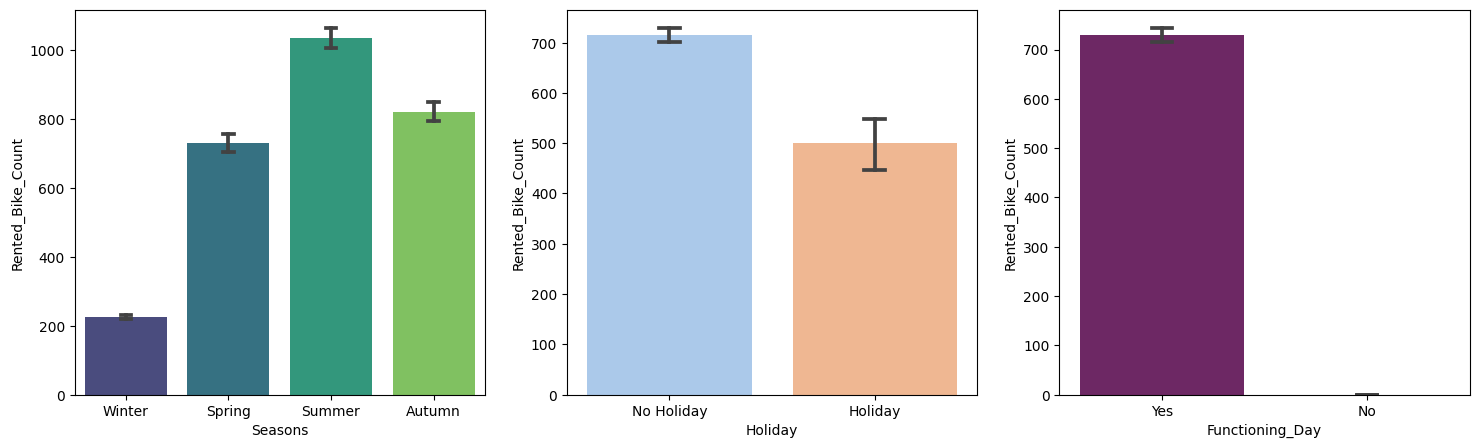

In [33]:
# Chart - 5 visualization code
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.barplot(bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax1,palette='viridis',capsize=0.1)
sns.barplot(bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax2,palette='pastel',capsize=0.1)
sns.barplot(bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax3,palette='inferno',capsize=0.1)
plt.show()

##### 1. Why did you pick the specific chart?

**To plot the variation in Rented Bike count due to Seasons,Holiday and Functioning day**

##### 2. What is/are the insight(s) found from the chart?

* **Count is maximum during summer but minimum during winter.**
* **During holidays counts drop down**.
* **Contribution of non-funtioning day to count is insignificant**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights about the count being maximum during summer, dropping during winter, and decreasing during holidays can help businesses plan their resources, adjust marketing strategies, and optimize operations to meet customer demand, resulting in a positive business impact. Additionally, the understanding that non-functioning days have an insignificant contribution can guide businesses in allocating resources more efficiently.**

#### Chart - 6

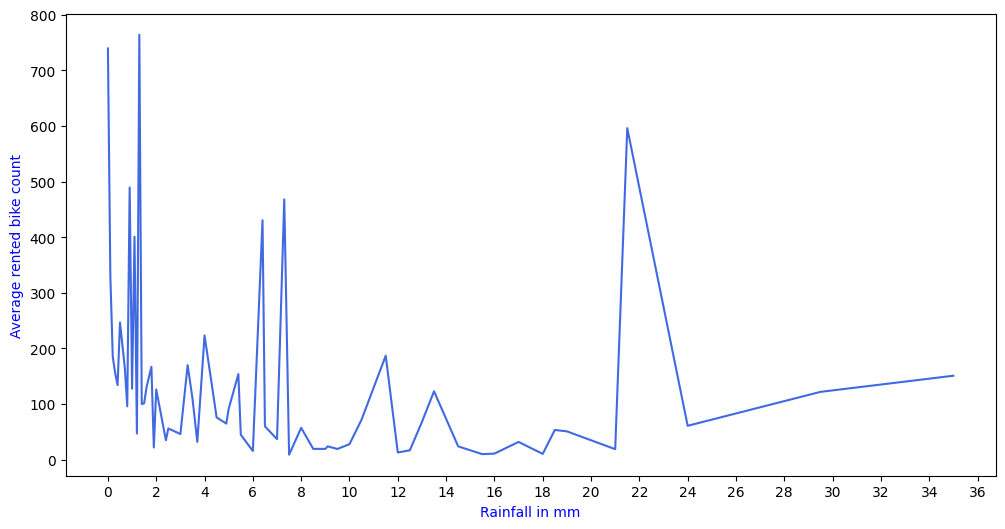

In [34]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
bike_df.groupby('Rainfall')['Rented_Bike_Count'].mean().plot(c='royalblue')
plt.xlabel('Rainfall in mm',color='blue')
plt.ylabel('Average rented bike count',color='blue')
plt.xticks(range(0,37,2))
plt.show()

##### 1. Why did you pick the specific chart?

**to analyze the relationship between "Rented_Bike_Count" and "Rainfall"**

##### 2. What is/are the insight(s) found from the chart?

**The above plot indicates that despite heavy rainfall, the demand for rented bikes does not decrease. For instance, even with a rainfall of 22-24 mm, there is a significant peak in the number of rented bikes.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that heavy rainfall does not decrease the demand for rented bikes can have a positive business impact. Businesses can leverage this information to optimize their operations during rainy periods and ensure a continuous supply of bikes, meeting customer demand and potentially increasing revenue.**

#### Chart - 7

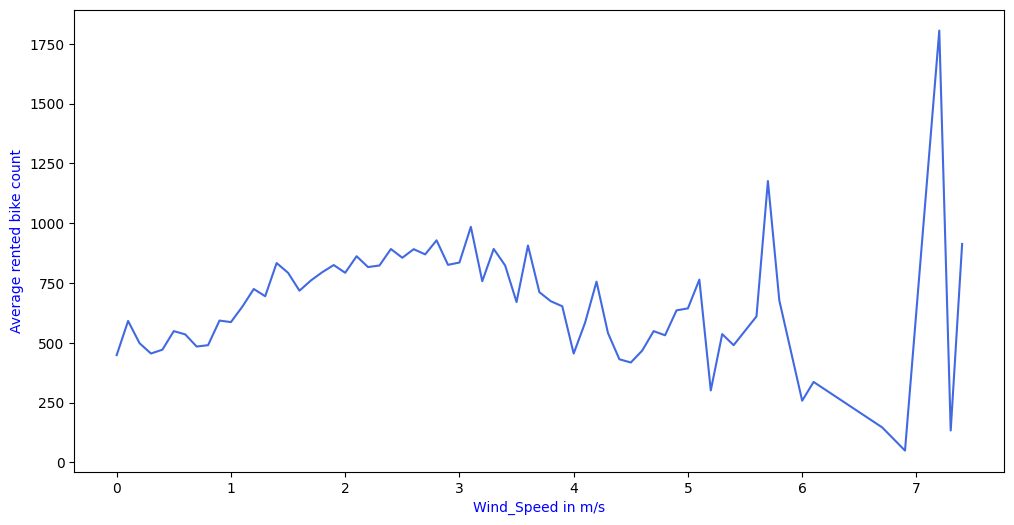

In [35]:
# Chart - 7 visualization code
# Chart - 7 : plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
plt.figure(figsize=(12,6))
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot(c='royalblue')
plt.xlabel('Wind_Speed in m/s',color='blue')
plt.ylabel('Average rented bike count',color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

**To analyze the relationship between "Rented_Bike_Count" and "Wind_speed"**

##### 2. What is/are the insight(s) found from the chart?

**From the plot above, we can observe that the demand for rented bikes is evenly distributed regardless of the wind speed. However, there is a spike in bike rentals when the wind speed is at 7 m/s, indicating that people enjoy riding bikes when there is a slight breeze.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight about the even distribution of bike rentals regardless of wind speed, with a spike at 7 m/s, can have a positive business impact. Businesses can promote biking as an enjoyable activity during breezy conditions, potentially increasing bike rentals and attracting more customers.**

#### Chart - 8

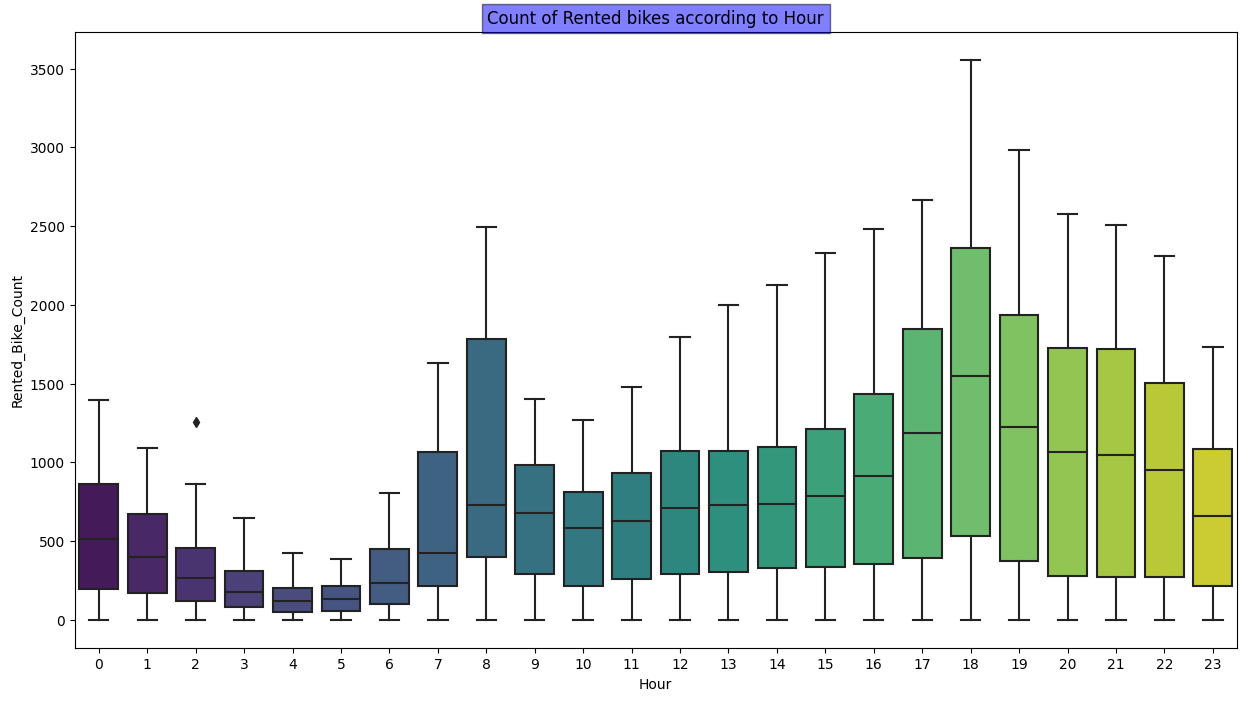

In [36]:
# Chart - 8 visualization code
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=bike_df, x='Hour', y='Rented_Bike_Count', ax=ax,palette='viridis')
plt.title('Count of Rented bikes according to Hour',bbox={'facecolor':'blue', 'alpha':0.5})
plt.show()

##### 1. Why did you pick the specific chart?

**To see the count of rented bike hourly**

##### 2. What is/are the insight(s) found from the chart?

**The plot above showcases the usage of rented bikes across different hours throughout the year. It is notable that people tend to use rented bikes during their working hours, specifically from 7 AM to 9 AM and 5 PM to 7 PM.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that people tend to use rented bikes during their working hours can have a positive business impact. Businesses can optimize their operations and marketing efforts during these peak hours to meet customer demand, attract more riders, and potentially increase revenue.**

#### Chart - 9

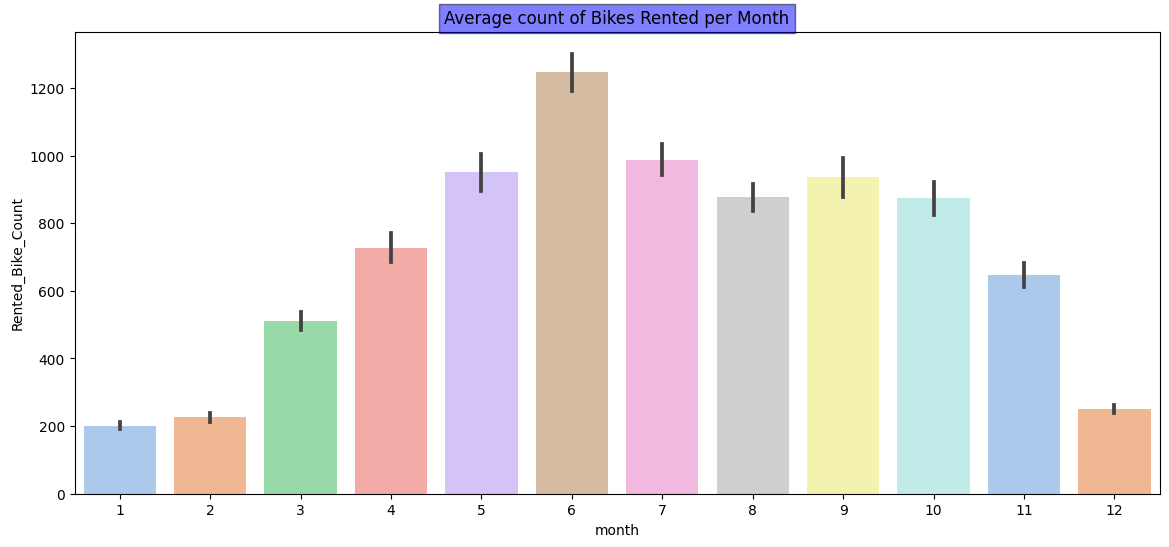

In [37]:
# Chart - 9 visualization code
plt.figure(figsize=(14,6))
sns.barplot(x='month',y='Rented_Bike_Count',data=bike_df,palette='pastel')
plt.title('Average count of Bikes Rented per Month',bbox={'facecolor':'blue','alpha':0.5})
plt.show()
# bbox={'facecolor':'blue', 'alpha':0.5}


##### 1. Why did you pick the specific chart?

**To Check Average count of Bikes Rented per Month**

##### 2. What is/are the insight(s) found from the chart?

**During Summer season the demand for rented bikes are on hike while during winter demand is low.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that demand for rented bikes is high during summer and low during winter can help businesses align their resources and marketing strategies accordingly, maximizing revenue and creating a positive business impact.**

## ***TriVariate Analysis***

#### Chart - 10

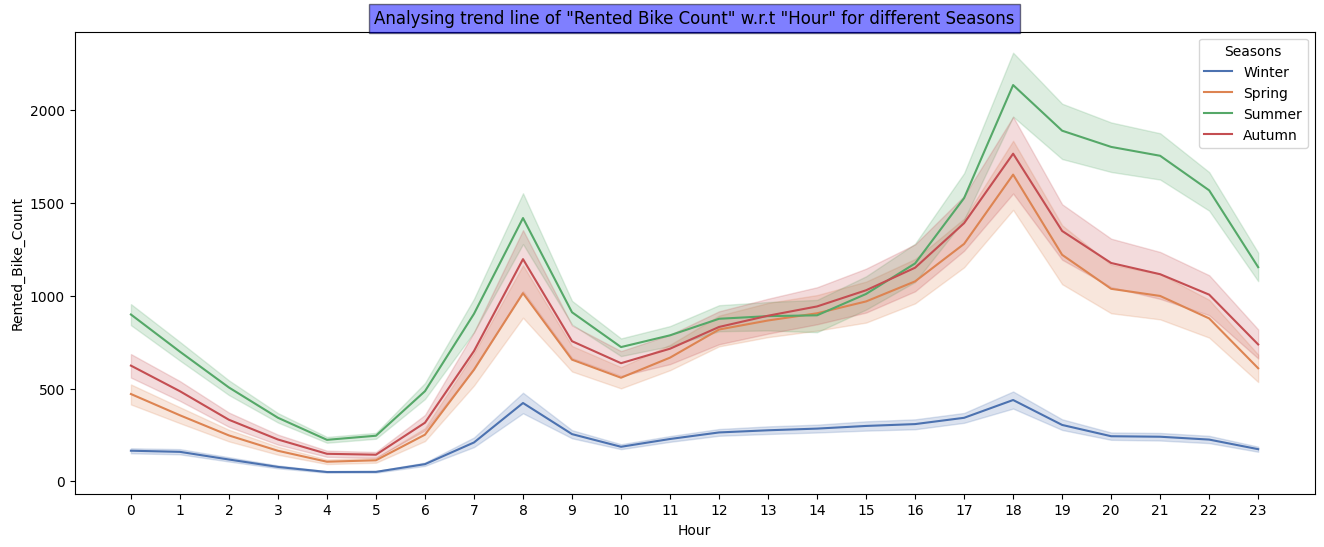

In [38]:
# Chart - 10 visualization code
plt.figure(figsize=(16,6))
sns.lineplot(x='Hour',y= "Rented_Bike_Count",data=bike_df,hue='Seasons',palette='deep',alpha=1)
plt.xticks(range(0,24))
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" for different Seasons',bbox={'facecolor':'blue','alpha':0.5})
plt.show()

##### 1. Why did you pick the specific chart?

**Analysing trend line of "Rented Bike Count" w.r.t "Hour" for different Seasons**

##### 2. What is/are the insight(s) found from the chart?

 **The analysis reveals that the use of rented bikes is significantly high during the summer season with peak demand during 7am-9am and 5pm-7pm. However, during the winter season, the use of rented bikes is quite low due to snowfall.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights that highlight high demand for rented bikes during the summer season and specific peak hours, as well as low demand during the winter season due to snowfall, can help businesses optimize operations, target marketing efforts, and adjust resources accordingly, leading to a positive business impact.**

#### Chart - 11

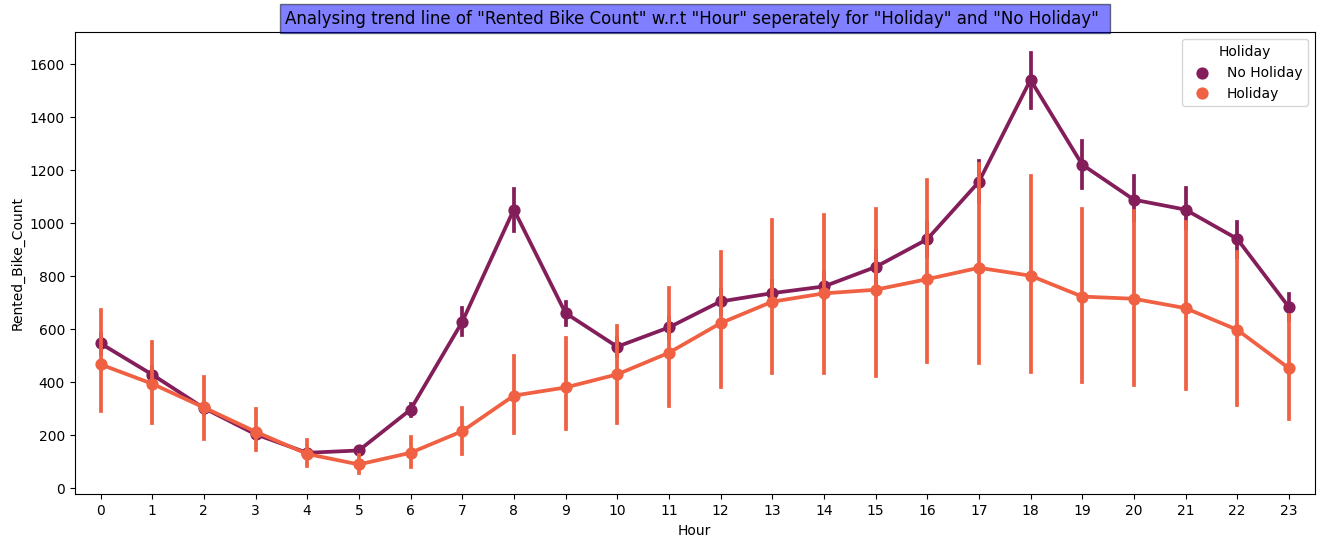

In [39]:
# Chart - 11 visualization code
plt.figure(figsize=(16,6))
sns.pointplot(x='Hour',y= "Rented_Bike_Count",data=bike_df,hue='Holiday',palette='rocket')
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" seperately for "Holiday" and "No Holiday" ',
                                      bbox={'facecolor':'blue', 'alpha':0.5})
plt.show()

##### 1. Why did you pick the specific chart?

**To Analysing trend line of "Rented Bike Count" w.r.t "Hour" seperately for "Holiday" and "No Holiday"**

##### 2. What is/are the insight(s) found from the chart?

**During Holidays People prefer to use rented bikes after 12 pm.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insight that people prefer to use rented bikes after 12 pm during holidays can help businesses adjust their operational hours and allocate resources effectively, catering to the increased demand and potentially creating a positive business impact.**

#### Chart - 12

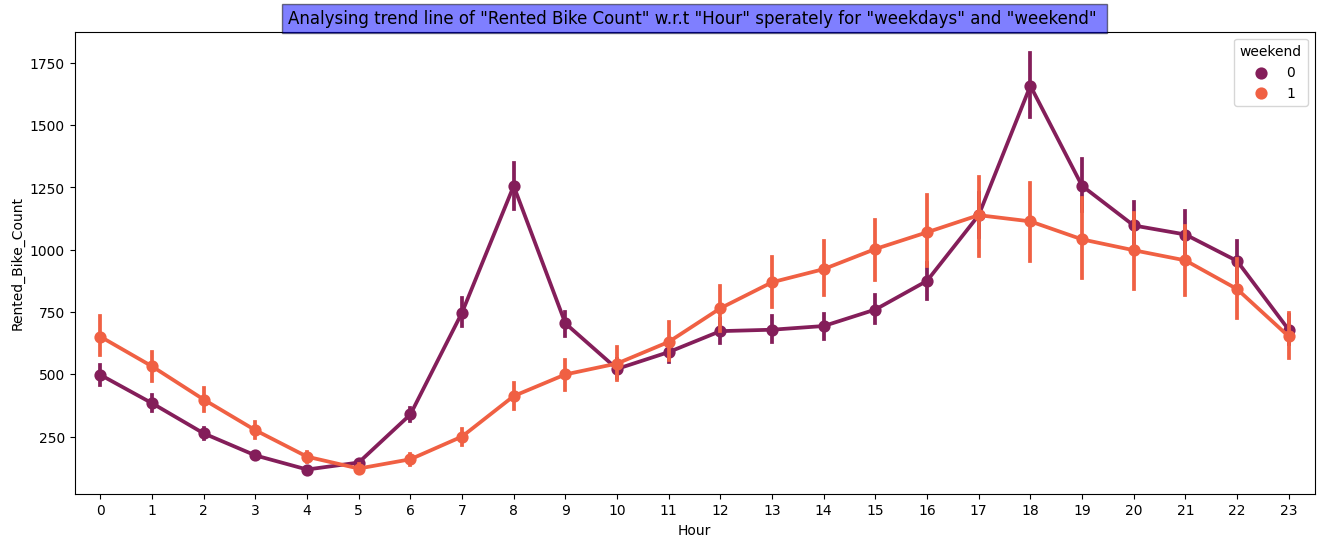

In [40]:
# Chart - 12 visualization code
plt.figure(figsize=(16,6))
sns.pointplot(x='Hour',y= "Rented_Bike_Count",data=bike_df,hue='weekend',palette='rocket')
plt.title('Analysing trend line of "Rented Bike Count" w.r.t "Hour" sperately for "weekdays" and "weekend" ',
                        bbox={'facecolor':'blue','alpha':0.5})
plt.show()

##### 1. Why did you pick the specific chart?

**To Analysing trend line of "Rented Bike Count" w.r.t "Hour" sperately for "weekdays" and "weekend"**

##### 2. What is/are the insight(s) found from the chart?

* **we can observe that the demand for rented bikes is higher on weekdays and more specifically between 7am-9am and 5pm-7pm**.
* **On weekends,the demand for rented bikes is generally lower, especially during the morning hours but rise thereafter.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights about higher demand for rented bikes on weekdays, specifically during peak commuting hours, and lower demand on weekends, especially in the morning, can help businesses optimize their operations, staffing, and marketing strategies to cater to these patterns, potentially leading to a positive business impact**

### **Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

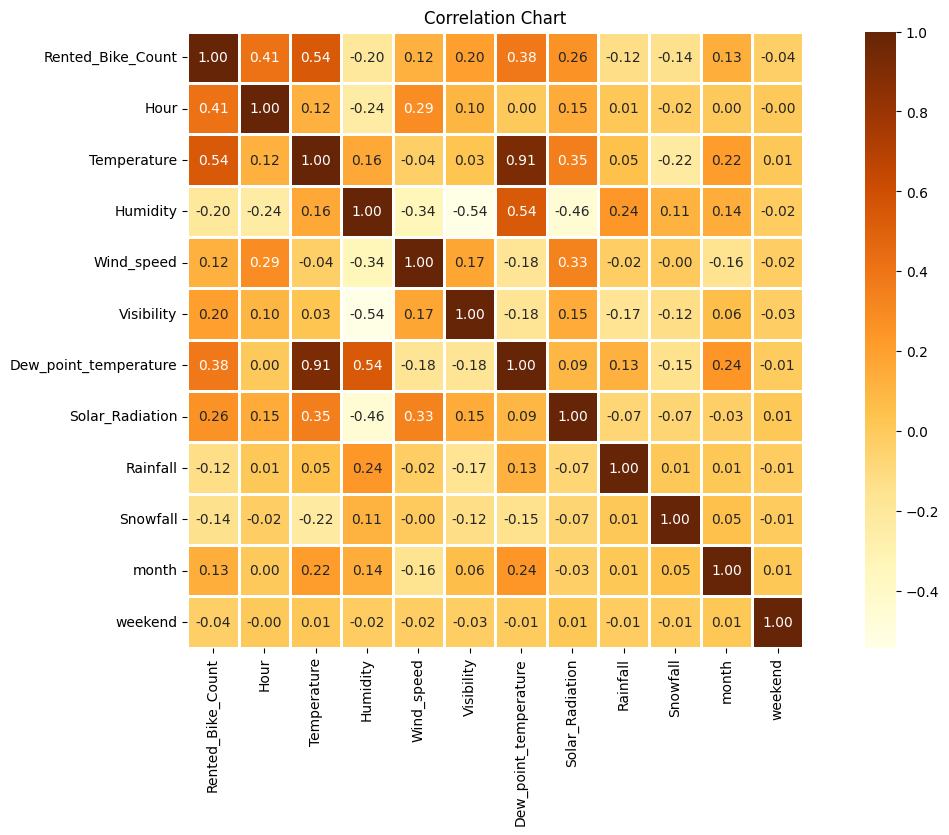

In [41]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,8))
plt.title('Correlation Chart')
sns.heatmap(bike_df[bike_df.describe().columns].corr(),annot=True,annot_kws={'size': 10},linewidths=2,square=True,fmt='.2f',cmap='YlOrBr')
plt.show()

### **Presence of Multicollinearity**
* **We observe that columns 'Temperature' and 'Dew point temperature' are highly positively correlated, with a correlation coefficient of 0.91.**
* **'Visibility' and 'Humidity' have high negative correlation as compared to others, with a correlation coefficient of -0.54.**

### **Using VIF to remove Multicollinearity**
*  <I>VIF score should be less than 5 for no multicollinearity.<I>

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

# Calculating VIF
  vif =pd.DataFrame()
  vif['Features']= X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [43]:
bike_df_copy=bike_df.copy()

In [44]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ["Rented_Bike_Count"]]])

Features        VIF
0                    Hour   4.425348
1             Temperature  34.919399
2                Humidity   7.003058
3              Wind_speed   4.881602
4              Visibility   9.378738
5   Dew_point_temperature  17.802987
6         Solar_Radiation   2.882967
7                Rainfall   1.082184
8                Snowfall   1.131902
9                   month   5.094506
10                weekend   1.409771

In [45]:
bike_df_copy.drop(columns = ['Dew_point_temperature'],axis = 1, inplace = True)

In [46]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ["Rented Bike Count"]]])

Features       VIF
0   Rented_Bike_Count  4.108312
1                Hour  4.695247
2         Temperature  4.487960
3            Humidity  6.410393
4          Wind_speed  4.661397
5          Visibility  5.458484
6     Solar_Radiation  2.269775
7            Rainfall  1.104438
8            Snowfall  1.131138
9               month  5.035427
10            weekend  1.383530

In [47]:
bike_df_copy.drop(columns = ['Humidity'],axis = 1, inplace = True)

In [48]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ["Rented Bike Count"]]])

Features       VIF
0  Rented_Bike_Count  3.944904
1               Hour  4.577544
2        Temperature  3.665003
3         Wind_speed  4.281757
4         Visibility  5.344758
5    Solar_Radiation  1.912766
6           Rainfall  1.082502
7           Snowfall  1.095872
8              month  4.083921
9            weekend  1.360905

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: <i>There is no significant relationship between the independent variables and the 'Rented Bike Count' (dependent variable).<i>

**Alternate Hypothesis (Ha)**: <i>There is a significant relationship between the independent variables and the 'Rented Bike Count' (dependent variable).<i>

#### 2. Perform an appropriate statistical test.

**To test this hypothesis, we can perform statistical tests such as:**

* *Feature Significance Test: Evaluate the p-values of the coefficients of the independent variables in the regression model. If the p-values are below a predetermined significance level (e.g., 0.05), reject the null hypothesis and conclude that there is a significant relationship between the independent variables and the 'Rented Bike Count.'*

* *Overall Model Significance Test: Assess the overall significance of the regression model by conducting an F-test or chi-square test. If the p-value is below the chosen significance level, reject the null hypothesis and conclude that the model as a whole is significant in predicting the 'Rented Bike Count.'*

####**Ordinary Least Square Model**

In [49]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm


# Add a constant column to the DataFrame for the intercept term
bike_df_copy = sm.add_constant(bike_df_copy)

independent_vars=bike_df_copy[bike_df_copy.describe().columns].drop('Rented_Bike_Count',axis=1)
dependent_var=bike_df_copy['Rented_Bike_Count']

# Perform the regression analysis
model = sm.OLS(dependent_var,independent_vars)
results = model.fit()

# Obtain the p-values
p_values = results.pvalues

print(round(p_values,5))

const              0.00000
Hour               0.00000
Temperature        0.00000
Wind_speed         0.01120
Visibility         0.00000
Solar_Radiation    0.53238
Rainfall           0.00000
Snowfall           0.10884
month              0.00157
weekend            0.00000
dtype: float64


In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     797.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:15:22   Log-Likelihood:                -66476.
No. Observations:                8760   AIC:                         1.330e+05
Df Residuals:                    8750   BIC:                         1.330e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -202.7172     19.513    -10.389      0.000    -240.967    -164.468
Hour               30.8584      0.779     39.611      0.000      29.331      32.385
Temperature        26.4803      0.495     53.540      0.000      25.511      27.450
Wind_speed         14.2207      5.605      2.537      0.011       3.233      25.208
Visibility          0.1256      0.009     14.260      0.000       0.108       0.143
Solar_Radiation     4.2730      6.843      0.624      0.532      -9.142      17.688
Rainfall          -74.6822      4.621    -16.163      0.000     -83.740     -65.625
Snowfall          -19.5051     12.163     -1.604      0.109     -43.348       4.338
month               4.9264      1.558      3.163      0.002       1.873       7.980
weekend           -55.2643     11.333     -4.876      0.000     -77.480     -33.048
==============================================================================
Omnibus:                      880.795   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1623.098
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       4.607   Cond. No.                     6.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion**
* For the 'Solar_Radiation' variable, the p-value is 0.53238, which is greater than 0.05. Therefore, there is not enough evidence to conclude a significant relationship between 'Solar_Radiation' and the 'Rented Bike Count'.
*Similarly, for the 'Snowfall' variable, the p-value is 0.10884, which is also greater than 0.05. Hence, there is not enough evidence to establish a significant relationship between 'Snowfall' and the 'Rented Bike Count'.



In summary, based on the given p-values, we can reject the null hypothesis for the independent variables 'Hour', 'Temperature', 'Wind_speed', 'Visibility', 'Rainfall', 'Month', and 'Weekend'. This implies that there is a significant relationship between these independent variables and the 'Rented Bike Count'. However, there is insufficient evidence to reject the null hypothesis for the 'Solar_Radiation' and 'Snowfall' variables, indicating that these variables may not have a significant relationship with the 'Rented Bike Count'.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0)**: The dependent variable is normally distributed in the population.

**Alternative hypothesis (Ha)**: The dependent variable is not normally distributed in the population.

#### 2. Perform an appropriate statistical test.

####**Shapiro-Wilk test**

In [51]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(bike_df_copy['Rented_Bike_Count'])

print("Shapiro-Wilk Test")
print("Test statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Test statistic: 0.8822193145751953
p-value: 0.0


**Conclusion**
Based on the Shapiro-Wilk test results, with a test statistic of 0.8822 and a p-value of 0.0, the p-value is less than the chosen significance level (e.g., 0.05). Therefore, we would reject the null hypothesis (H0) that the dependent variable is normally distributed.

In [52]:
bike_df_copy.drop('const',axis=1,inplace=True)

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

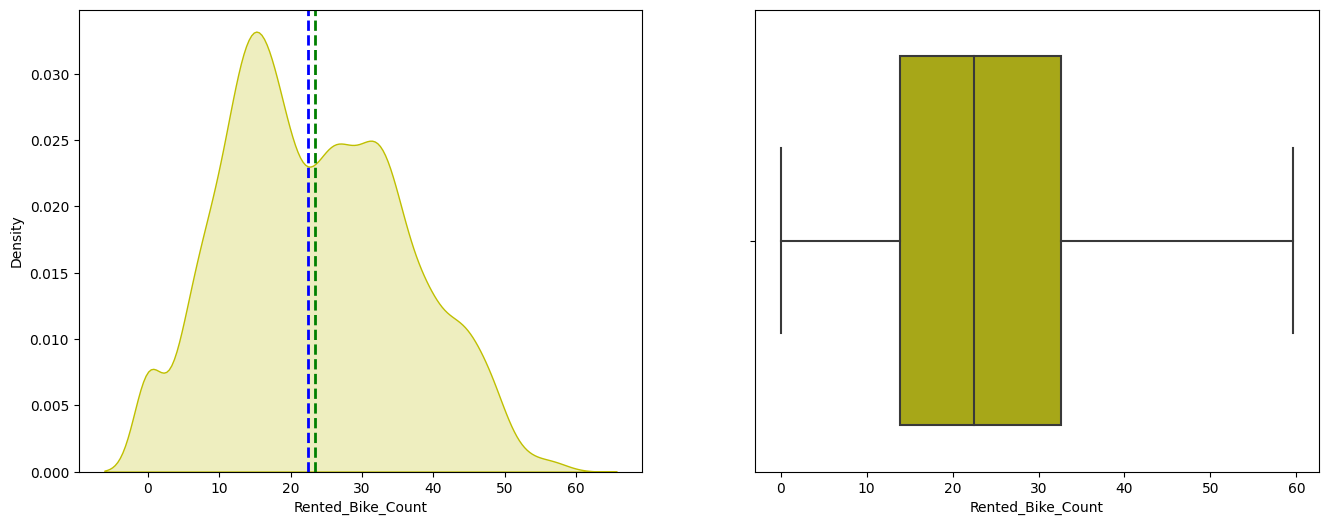

In [53]:
# Handling Outliers & Outlier treatments
# Treatment of Outliers in our dependent Variable(applying square root transformation)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
sns.kdeplot(np.sqrt(bike_df_copy['Rented_Bike_Count']),color='y',fill=True,ax=ax1)
ax1.axvline(np.sqrt(bike_df_copy['Rented_Bike_Count']).mean(), color='green', linestyle='dashed', linewidth=2)
ax1.axvline(np.sqrt(bike_df_copy['Rented_Bike_Count']).median(), color='blue', linestyle='dashed', linewidth=2)
sns.boxplot(x= np.sqrt(bike_df_copy['Rented_Bike_Count']),color='y')
plt.show()

### 3. Categorical Encoding

In [54]:
# Encode your categorical columns
#ONE HOT ENCODING
cat_features=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekend']
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-hot encoding enables a more descriptive representation of categorical data.Since many machine learning algorithms do not accept categorical data as input, the categories need to be converted into numerical values.**

In [55]:
for col in cat_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

Rented_Bike_Count  Temperature  Wind_speed  Visibility  Solar_Radiation  \
0                254         -5.2         2.2        2000              0.0   
1                204         -5.5         0.8        2000              0.0   
2                173         -6.0         1.0        2000              0.0   
3                107         -6.2         0.9        2000              0.0   
4                 78         -6.0         2.3        2000              0.0   

   Rainfall  Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  \
0       0.0       0.0       0       0       0  ...        0        0        0   
1       0.0       0.0       1       0       0  ...        0        0        0   
2       0.0       0.0       0       1       0  ...        0        0        0   
3       0.0       0.0       0       0       1  ...        0        0        0   
4       0.0       0.0       0       0       0  ...        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  weekend_1  
0        0        0        0         0         0         1          0  
1        0        0        0         0         0         1          0  
2        0        0        0         0         0         1          0  
3        0        0        0         0         0         1          0  
4        0        0        0         0         0         1          0  

[5 rows x 47 columns]

In [56]:
bike_df_copy.columns

Index(['Rented_Bike_Count', 'Temperature', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekend_1'],
      dtype='object')

### 6. Data Scaling

In [57]:
# Scaling your data
features = list(set(bike_df_copy.columns) - {'Rented_Bike_Count'})
from scipy.stats import zscore
bike_df_copy[features]=bike_df_copy[features].apply(zscore)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

In [58]:
X=bike_df_copy.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [59]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=19)
print(X_train.shape)
print(X_test.shape)

(6570, 46)
(2190, 46)


In [60]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Wind_speed           8760 non-null   float64
 3   Visibility           8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Hour_1               8760 non-null   float64
 8   Hour_2               8760 non-null   float64
 9   Hour_3               8760 non-null   float64
 10  Hour_4               8760 non-null   float64
 11  Hour_5               8760 non-null   float64
 12  Hour_6               8760 non-null   float64
 13  Hour_7               8760 non-null   float64
 14  Hour_8               8760 non-null   float64
 15  Hour_9               8760 non-null   f

### **Linear Regression**

In [61]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
#check the score
lr.score(X_train,y_train)

0.7636010810913401

In [63]:
#check the coefficient
lr.coef_

array([ 6.57232179e+00, -8.55358692e-02,  1.95896508e+00,  1.66187339e+00,
       -1.86230157e+00, -2.94619284e-01, -4.34990197e-01, -9.77523805e-01,
       -1.51442565e+00, -1.93169644e+00, -1.86277366e+00, -9.16218096e-01,
        3.47190765e-01,  1.53802177e+00,  2.37802407e-01, -6.23052347e-01,
       -6.21938276e-01, -5.16902841e-01, -4.91655506e-01, -5.03119172e-01,
       -2.10801897e-01,  1.70498148e-01,  9.84618796e-01,  2.12810796e+00,
        1.52173549e+00,  1.32311655e+00,  1.36117072e+00,  1.11094617e+00,
        3.46455176e-01,  2.89104073e+12,  5.03466055e+12,  4.92627350e+12,
        6.40154845e-01,  5.22553575e+00, -3.03435469e-01,  1.33005237e+12,
        1.31038132e+12,  1.33005237e+12, -4.56057821e+10, -4.62904025e+10,
       -4.62904025e+10,  3.13916359e+12,  3.18628778e+12,  3.13916359e+12,
        3.24606938e-01, -6.43277789e-01])

In [64]:
# Prediction
y_pred_train= lr.predict(X_train)
y_pred_test= lr.predict(X_test)

In [65]:
# Calculate: Training Set
# 1. mean_squared_error
mse_lr= mean_squared_error(y_train,y_pred_train)
print('MSE :' , mse_lr)
#2. Root_mean_squared_error
rmse_lr=np.sqrt(mse_lr)
print('RMSE :' , rmse_lr)
#3. mean_absolute_error
mae_lr=mean_absolute_error(y_train,y_pred_train)
print('MAE :' ,mae_lr)
#4. coefficient of determination(r2_score)
r2_lr=r2_score(y_train,y_pred_train)
print('R2 :' ,r2_lr)
#5. adjusted  coefficient of determination
adjusted_r2_lr=(1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lr)

MSE : 36.49203034245854
RMSE : 6.040863377238269
MAE : 4.5530372039095175
R2 : 0.7636010810913401
Adjusted R2 : 0.7619340030183984


In [66]:
#Storing
lr_dict={'Model':'Linear Regression','MAE':round(mae_lr,2),'MSE':round(mse_lr,2),'RMSE':round(rmse_lr,2),'R2_score':round(r2_lr,2),'Adjusted R2_score':round(adjusted_r2_lr,2)}
training_df=pd.DataFrame(lr_dict,index=[1])
training_df

Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
1  Linear Regression  4.55  36.49  6.04      0.76               0.76

In [67]:
# Calculate: Test Set
# 1. mean_squared_error
mse_lr= mean_squared_error(y_test,y_pred_test)
print('MSE :' , mse_lr)
#2. Root_mean_squared_error
rmse_lr=np.sqrt(mse_lr)
print('RMSE :' , rmse_lr)
#3. mean_absolute_error
mae_lr=mean_absolute_error(y_test,y_pred_test)
print('MAE :' ,mae_lr)
#4. coefficient of determination(r2_score)
r2_lr=r2_score(y_test,y_pred_test)
print('R2 :' ,r2_lr)
#5. adjusted  coefficient of determination
adjusted_r2_lr=(1-(1-r2_score(y_test,y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lr)

MSE : 37.49179310670906
RMSE : 6.123054230260341
MAE : 4.561515511373977
R2 : 0.7610446781067197
Adjusted R2 : 0.7593595723567441


In [68]:
#Storing
lr_dict2={'Model':'Linear Regression','MAE':round(mae_lr,2),'MSE':round(mse_lr,2),'RMSE':round(rmse_lr,2),'R2_score':round(r2_lr,2),'Adjusted R2_score':round(adjusted_r2_lr,2)}
test_df=pd.DataFrame(lr_dict2,index=[1])
test_df

Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
1  Linear Regression  4.56  37.49  6.12      0.76               0.76

### **Concluding Remark:**

* The linear regression model shows moderate performance on both the training and test sets.
* The model achieves an R-squared (R2) value of approximately 0.76, indicating that around 76% of the variance in the target variable is explained by the independent variables.
* The mean squared error (MSE) values are 36.49 (training set) and 37.49 (test set), suggesting moderate errors in the predictions.
* The root mean squared error (RMSE) values are around 6.04 and 6.12, indicating the average magnitude of the errors.
* The mean absolute error (MAE) values are approximately 4.55 and 4.56, representing the average absolute deviation of the predictions.
* The adjusted R-squared values account for the number of predictors in the model, showing a similar pattern.
* Overall, further analysis and model refinement may be beneficial to improve the performance.

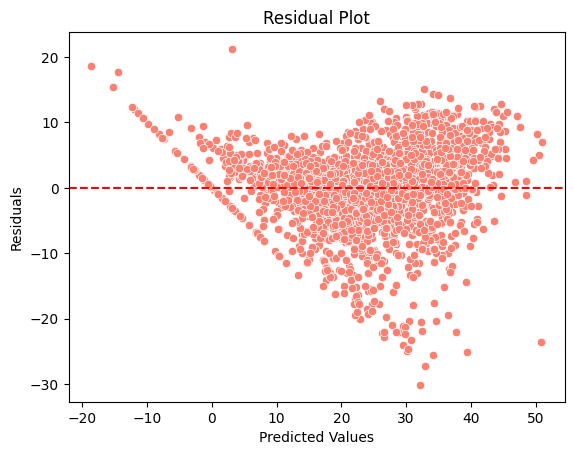

In [69]:
# Checking Heteroscedasticity
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals,color='salmon')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

* **Since,the  points in the scatter plot are more or less evenly distributed on both sides of the line y=0, it suggests that the residuals have relatively consistent variability across the range of predicted values. This indicates homoscedasticity rather than heteroscedasticity**.

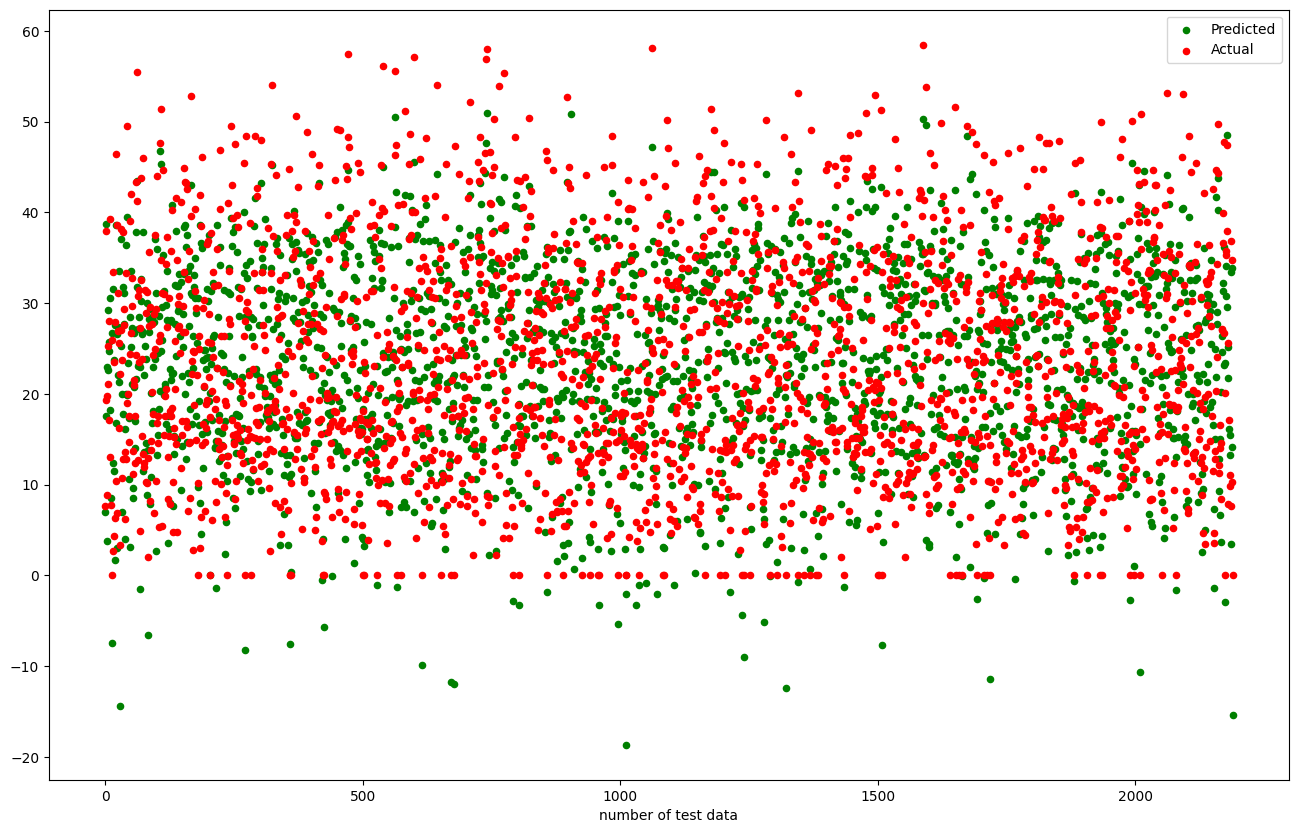

In [70]:
plt.figure(figsize=(16,10))
plt.scatter(range(len(y_pred_test)),y_pred_test,s=20,c='green',label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='red', label='Actual')
plt.legend()
plt.xlabel('number of test data')
plt.show()

### **Lasso Regression(L1 Regularization)**

In [71]:
lasso = Lasso(alpha=0.1,max_iter=3500)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3500)

In [72]:
#check the score
lasso.score(X_train,y_train)

0.7601251825757874

In [73]:
# Prediction
y_pred_train_lasso= lasso.predict(X_train)
y_pred_test_lasso= lasso.predict(X_test)

In [74]:
# Calculate: Training Set
# 1. mean_squared_error
mse_lasso= mean_squared_error(y_train,y_pred_train_lasso)
print('MSE :' , mse_lasso)
#2. Root_mean_squared_error
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE :' , rmse_lasso)
#3. mean_absolute_error
mae_lasso=mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE :' ,mae_lasso)
#4. coefficient of determination(r2_score)
r2_lasso=r2_score(y_train,y_pred_train_lasso)
print('R2 :' ,r2_lasso)
#5. adjusted  coefficient of determination
adjusted_r2_lasso=(1-(1-r2_score(y_train,y_pred_train_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lasso)

MSE : 37.02859199291965
RMSE : 6.085112323771818
MAE : 4.571329774881155
R2 : 0.7601251825757874
Adjusted R2 : 0.7584335925709562


In [75]:
#Storing
lasso_dict={'Model':'Lasso Regression','MAE':round(mae_lasso,2),'MSE':round(mse_lasso,2),'RMSE':round(rmse_lasso,2),'R2_score':round(r2_lasso,2),'Adjusted R2_score':round(adjusted_r2_lasso,2)}
training_df=training_df.append(lasso_dict,ignore_index=True)
training_df

Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
0  Linear Regression  4.55  36.49  6.04      0.76               0.76
1   Lasso Regression  4.57  37.03  6.09      0.76               0.76

In [76]:
# Calculate: Test  Set
# 1. mean_squared_error
mse_lasso= mean_squared_error(y_test,y_pred_test_lasso)
print('MSE :' , mse_lasso)
#2. Root_mean_squared_error
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE :' , rmse_lasso)
#3. mean_absolute_error
mae_lasso=mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE :' ,mae_lasso)
#4. coefficient of determination(r2_score)
r2_lasso=r2_score(y_test,y_pred_test_lasso)
print('R2 :' ,r2_lasso)
#5. adjusted  coefficient of determination
adjusted_r2_lasso=(1-(1-r2_score(y_test,y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_lasso)

MSE : 38.59870286591022
RMSE : 6.212785435367152
MAE : 4.619906183995424
R2 : 0.7539897480567245
Adjusted R2 : 0.7487090800262108


In [77]:
#Storing
lasso_dict2={'Model':'Lasso Regression','MAE':round(mae_lasso,2),'MSE':round(mse_lasso,2),'RMSE':round(rmse_lasso,2),'R2_score':round(r2_lasso,2),'Adjusted R2_score':round(adjusted_r2_lasso,2)}
test_df=test_df.append(lasso_dict2,ignore_index=True)
test_df

Model   MAE    MSE  RMSE  R2_score  Adjusted R2_score
0  Linear Regression  4.56  37.49  6.12      0.76               0.76
1   Lasso Regression  4.62  38.60  6.21      0.75               0.75

###**Ridge Regression(L2 Regularization)**

In [78]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [79]:
#check the score
ridge.score(X_train,y_train)

0.7636010821968624

In [80]:
# Prediction
y_pred_train_ridge= ridge.predict(X_train)
y_pred_test_ridge= ridge.predict(X_test)

In [81]:
# Calculate: Training Set
# 1. mean_squared_error
mse_ridge= mean_squared_error(y_train,y_pred_train_ridge)
print('MSE :' , mse_ridge)
#2. Root_mean_squared_error
rmse_ridge=np.sqrt(mse_ridge)
print('RMSE :' , rmse_ridge)
#3. mean_absolute_error
mae_ridge=mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE :' ,mae_ridge)
#4. coefficient of determination(r2_score)
r2_ridge=r2_score(y_train,y_pred_train_ridge)
print('R2 :' ,r2_ridge)
#5. adjusted  coefficient of determination
adjusted_r2_ridge=(1-(1-r2_score(y_train,y_pred_train_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_ridge)

MSE : 36.49203017180312
RMSE : 6.040863363113184
MAE : 4.553276502635143
R2 : 0.7636010821968624
Adjusted R2 : 0.7619340041317169


In [82]:
#Storing
ridge_dict={'Model':'Ridge Regression','MAE':round(mae_ridge,2),'MSE':round(mse_ridge,2),'RMSE':round(rmse_ridge,2),'R2_score':round(r2_ridge,2),'Adjusted R2_score':round(adjusted_r2_ridge,2)}
training_df=training_df.append(ridge_dict,ignore_index=True)


In [83]:
# Calculate: Test Set
# 1. mean_squared_error
mse_ridge= mean_squared_error(y_test,y_pred_test_ridge)
print('MSE :' , mse_ridge)
#2. Root_mean_squared_error
rmse_ridge=np.sqrt(mse_ridge)
print('RMSE :' , rmse_ridge)
#3. mean_absolute_error
mae_ridge=mean_absolute_error(y_test,y_pred_test_ridge)
print('MAE :' ,mae_ridge)
#4. coefficient of determination(r2_score)
r2_ridge=r2_score(y_test,y_pred_test_ridge)
print('R2 :' ,r2_ridge)
#5. adjusted  coefficient of determination
adjusted_r2_ridge=(1-(1-r2_score(y_test,y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_ridge)

MSE : 37.492899052098196
RMSE : 6.1231445395399735
MAE : 4.561722436191943
R2 : 0.7610376293231178
Adjusted R2 : 0.7559082457248273


In [84]:
#Storing
ridge_dict2={'Model':'Ridge Regression','MAE':round(mae_ridge,2),'MSE':round(mse_ridge,2),'RMSE':round(rmse_ridge,2),'R2_score':round(r2_ridge,2),'Adjusted R2_score':round(adjusted_r2_ridge,2)}
test_df=test_df.append(ridge_dict2,ignore_index=True)

### **Elastic Net Regression**

In [85]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [86]:
#check the score
elasticnet.score(X_train, y_train)

0.7576073374834491

In [87]:
# Prediction
y_pred_train_elasticnet= elasticnet.predict(X_train)
y_pred_test_elasticnet= elasticnet.predict(X_test)

In [88]:
# Calculate: Training Set
# 1. mean_squared_error
mse_elasticnet= mean_squared_error(y_train,y_pred_train_elasticnet)
print('MSE :' , mse_elasticnet)
#2. Root_mean_squared_error
rmse_elasticnet=np.sqrt(mse_elasticnet)
print('RMSE :' , rmse_elasticnet)
#3. mean_absolute_error
mae_elasticnet=mean_absolute_error(y_train,y_pred_train_elasticnet)
print('MAE :' ,mae_elasticnet)
#4. coefficient of determination(r2_score)
r2_elasticnet=r2_score(y_train,y_pred_train_elasticnet)
print('R2 :' ,r2_elasticnet)
#5. adjusted  coefficient of determination
adjusted_r2_elasticnet=(1-(1-r2_score(y_train,y_pred_train_elasticnet))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_elasticnet)

MSE : 37.41726246540485
RMSE : 6.116965135212466
MAE : 4.615117491556878
R2 : 0.7576073374834491
Adjusted R2 : 0.7558979917106818


In [89]:
#Storing
elasticnet_dict={'Model':'Elasticnet Regression','MAE':round(mae_elasticnet,2),'MSE':round(mse_elasticnet,2),'RMSE':round(rmse_elasticnet,2),'R2_score':round(r2_elasticnet,2),'Adjusted R2_score':round(adjusted_r2_elasticnet,2)}
training_df=training_df.append(elasticnet_dict,ignore_index=True)


In [90]:
# Calculate: Test Set
# 1. mean_squared_error
mse_elasticnet= mean_squared_error(y_test,y_pred_test_elasticnet)
print('MSE :' , mse_elasticnet)
#2. Root_mean_squared_error
rmse_elasticnet=np.sqrt(mse_elasticnet)
print('RMSE :' , rmse_elasticnet)
#3. mean_absolute_error
mae_elasticnet=mean_absolute_error(y_test,y_pred_test_elasticnet)
print('MAE :' ,mae_elasticnet)
#4. coefficient of determination(r2_score)
r2_elasticnet=r2_score(y_test,y_pred_test_elasticnet)
print('R2 :' ,r2_elasticnet)
#5. adjusted  coefficient of determination
adjusted_r2_elasticnet=(1-(1-r2_score(y_test,y_pred_test_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_elasticnet)

MSE : 39.02849178833235
RMSE : 6.247278750650747
MAE : 4.6721777667044915
R2 : 0.7512504725568506
Adjusted R2 : 0.7459110053322193


In [91]:
#Storing
elasticnet_dict2={'Model':'Elasticnet Regression','MAE':round(mae_elasticnet,2),'MSE':round(mse_elasticnet,2),'RMSE':round(rmse_elasticnet,2),'R2_score':round(r2_elasticnet,2),'Adjusted R2_score':round(adjusted_r2_elasticnet,2)}
test_df=test_df.append(elasticnet_dict2,ignore_index=True)

### **Gradient Boosting**

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [93]:
#check the score
gbr.score(X_train,y_train)

0.8616627416861525

In [94]:
# Prediction
y_pred_train_gbr= gbr.predict(X_train)
y_pred_test_gbr= gbr.predict(X_test)

In [95]:
# Calculate: Training Set
# 1. mean_squared_error
mse_gbr= mean_squared_error(y_train,y_pred_train_gbr)
print('MSE :' , mse_gbr)
#2. Root_mean_squared_error
rmse_gbr=np.sqrt(mse_gbr)
print('RMSE :' , rmse_gbr)
#3. mean_absolute_error
mae_gbr=mean_absolute_error(y_train,y_pred_train_gbr)
print('MAE :' ,mae_gbr)
#4. coefficient of determination(r2_score)
r2_gbr=r2_score(y_train,y_pred_train_gbr)
print('R2 :' ,r2_gbr)
#5. adjusted  coefficient of determination
adjusted_r2_gbr=(1-(1-r2_score(y_train,y_pred_train_gbr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_gbr)

MSE : 21.35461300409745
RMSE : 4.6211051712872155
MAE : 3.4319750255410755
R2 : 0.8616627416861525
Adjusted R2 : 0.8606871914972154


In [96]:
#Storing
gbr_dict={'Model':'Gradient Boosting Regression','MAE':round(mae_gbr,2),'MSE':round(mse_gbr,2),'RMSE':round(rmse_gbr,2),'R2_score':round(r2_gbr,2),'Adjusted R2_score':round(adjusted_r2_gbr,2)}
training_df=training_df.append(gbr_dict,ignore_index=True)

In [97]:
# Calculate: Test Set
# 1. mean_squared_error
mse_gbr= mean_squared_error(y_test,y_pred_test_gbr)
print('MSE :' , mse_gbr)
#2. Root_mean_squared_error
rmse_gbr=np.sqrt(mse_gbr)
print('RMSE :' , rmse_gbr)
#3. mean_absolute_error
mae_gbr=mean_absolute_error(y_test,y_pred_test_gbr)
print('MAE :' ,mae_gbr)
#4. coefficient of determination(r2_score)
r2_gbr=r2_score(y_test,y_pred_test_gbr)
print('R2 :' ,r2_gbr)
#5. adjusted  coefficient of determination
adjusted_r2_gbr=(1-(1-r2_score(y_test,y_pred_test_gbr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_gbr)

MSE : 24.199820047844128
RMSE : 4.919331260226753
MAE : 3.707817151376954
R2 : 0.8457615571270914
Adjusted R2 : 0.8424507926043878


In [98]:
#Storing
gbr_dict2={'Model':'Gradient Boosting Regression','MAE':round(mae_gbr,2),'MSE':round(mse_gbr,2),'RMSE':round(rmse_gbr,2),'R2_score':round(r2_gbr,2),'Adjusted R2_score':round(adjusted_r2_gbr,2)}
test_df=test_df.append(gbr_dict2,ignore_index=True)

### **Concluding Remark:**



The gradient boosting regression model performs well on both the training and test sets:

* It achieves a high R-squared (R2) value of approximately 0.86 (training set) and 0.85 (test set), indicating that around 86% and 85% of the variance in the target variable is explained by the model, respectively.

* The mean squared error (MSE) values are 21.35 (training set) and 24.20 (test set), representing the average squared difference between the predicted and actual values. Lower MSE values indicate better model performance.

* The root mean squared error (RMSE) values are 4.62 (training set) and 4.92 (test set), indicating the average magnitude of the errors. Smaller RMSE values suggest better model performance.

* The mean absolute error (MAE) values are 3.43 (training set) and 3.71 (test set), representing the average absolute deviation of the predictions. Lower MAE values indicate better accuracy.

Overall, the gradient boosting regression model demonstrates strong performance in predicting the target variable, with high R2 values and relatively low error metrics on both the training and test sets.

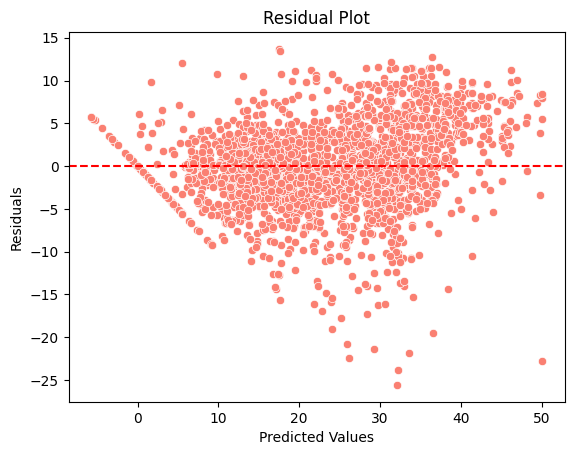

In [99]:
# Heteroscedasticity
residuals = y_test - y_pred_test_gbr
sns.scatterplot(x=y_pred_test_gbr, y=residuals,color='salmon')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

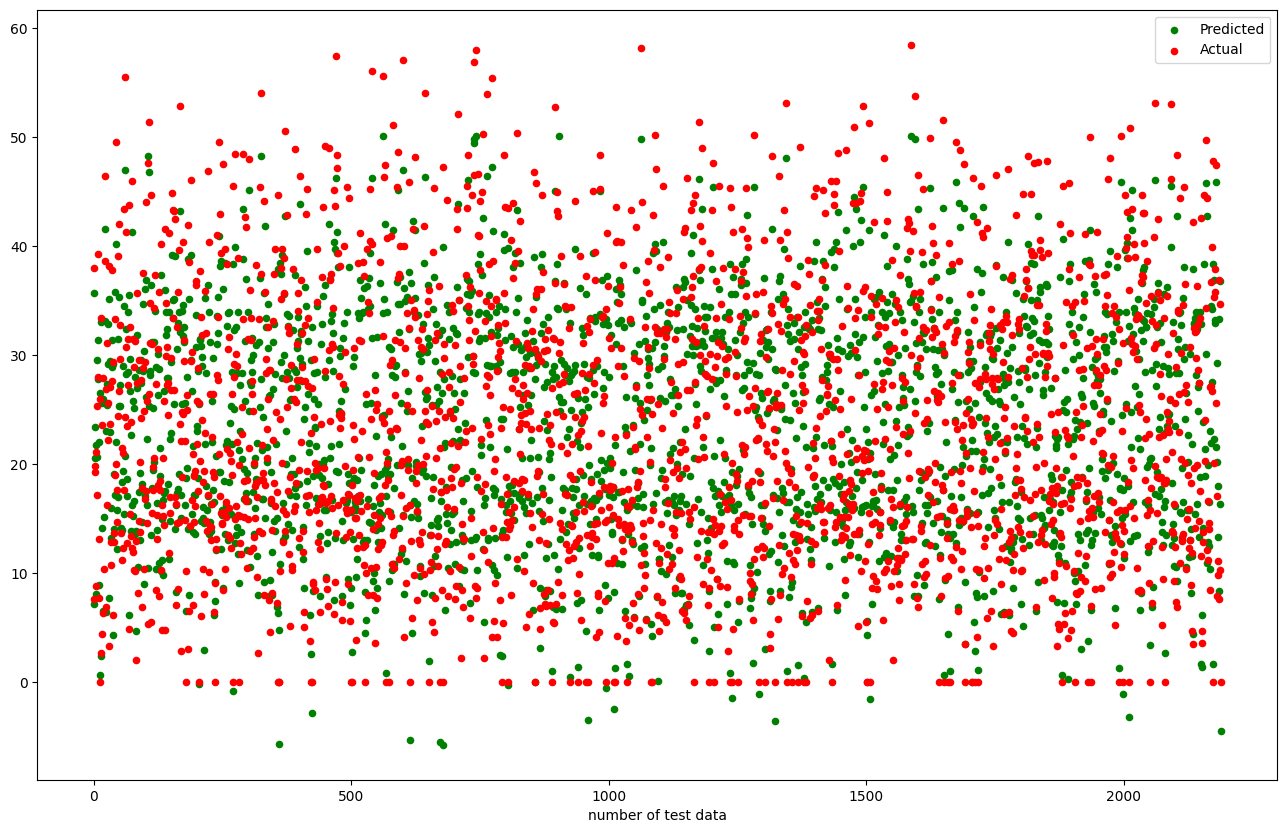

In [100]:
plt.figure(figsize=(16,10))
plt.scatter(range(len(y_pred_test_gbr)),y_pred_test_gbr,s=20,c='green',label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='red', label='Actual')
plt.legend()
plt.xlabel('number of test data')
plt.show()

In [101]:
# FEATURE IMPORTANCES:
gbr.feature_importances_

array([3.14460759e-01, 6.52620783e-03, 1.73525593e-02, 6.11419003e-02,
       1.21916611e-01, 3.64997725e-04, 0.00000000e+00, 5.31646728e-03,
       1.48566968e-02, 2.95988839e-02, 2.55773653e-02, 7.93383123e-03,
       1.34136650e-04, 8.22671600e-03, 0.00000000e+00, 3.53881283e-03,
       1.48248877e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.15929710e-04, 8.72250484e-03, 3.07554182e-02,
       1.66318840e-02, 1.04916466e-02, 1.99449566e-02, 1.56563023e-02,
       1.66905084e-03, 0.00000000e+00, 0.00000000e+00, 4.16181980e-02,
       1.66213199e-03, 1.92821287e-01, 0.00000000e+00, 9.14903892e-04,
       0.00000000e+00, 1.62918134e-03, 5.26267979e-03, 0.00000000e+00,
       2.14140190e-03, 0.00000000e+00, 6.37447680e-03, 5.40033827e-03,
       7.33522309e-05, 1.90859216e-02])

In [102]:
importance=np.round(gbr.feature_importances_,2)
importance_dict={'Feature':list(X_train.columns),'Feature Importance':importance}

In [103]:
importance_df=pd.DataFrame(importance_dict)
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
33  Functioning_Day_Yes                0.19
4              Rainfall                0.12
3       Solar_Radiation                0.06
31       Seasons_Winter                0.04
9                Hour_4                0.03
10               Hour_5                0.03
23              Hour_18                0.03
27              Hour_22                0.02
24              Hour_19                0.02
2            Visibility                0.02
26              Hour_21                0.02
45            weekend_1                0.02
13               Hour_8                0.01
22              Hour_17                0.01
43             month_11                0.01
42             month_10                0.01
38              month_6                0.01
7                Hour_2                0.01
11               Hour_6                0.01
25              Hour_20                0.01
1            Wind_speed                0.01
8                Hour_3                0.01
21              Hour_16                0.00
35              month_3                0.00
44             month_12                0.00
15              Hour_10                0.00
16              Hour_11                0.00
41              month_9                0.00
40              month_8                0.00
39              month_7                0.00
17              Hour_12                0.00
37              month_5                0.00
36              month_4                0.00
34              month_2                0.00
12               Hour_7                0.00
6                Hour_1                0.00
32   Holiday_No Holiday                0.00
5              Snowfall                0.00
30       Seasons_Summer                0.00
14               Hour_9                0.00
28              Hour_23                0.00
18              Hour_13                0.00
19              Hour_14                0.00
20              Hour_15                0.00
29       Seasons_Spring                0.00

In [104]:
features = X_train.columns
importance =gbr.feature_importances_
indices = np.argsort(importance)

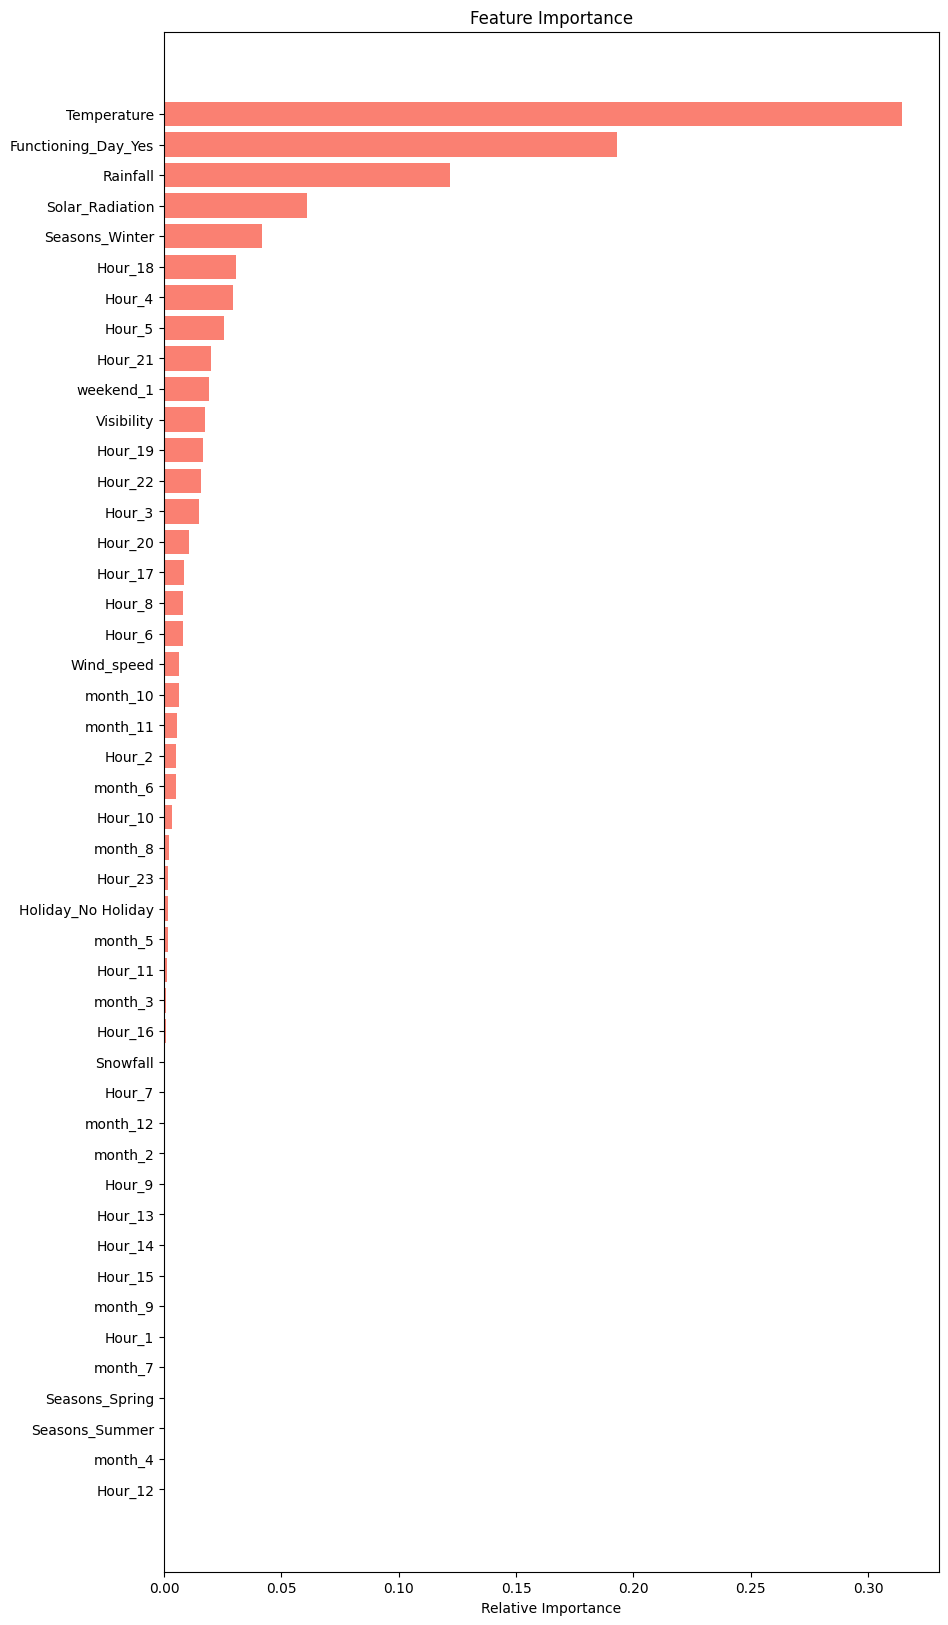

In [105]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='salmon', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###**GridSearchCV**

In [106]:
#Provide the range of values for chosen hyperparameters
# Number of Trees
n_estimators=[50,80,100]

#maximum depth of trees
max_depth=[4,6,8]

#minimum number of samples required to split a node
min_sample_split=[80,120,160]

#minimum number of samples required at each leaf node
min_sample_leaf=[30,40,50]

#hyperparameter Grid
para_dict= {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_sample_split,
              'min_samples_leaf' : min_sample_leaf}

In [107]:
gbr=GradientBoostingRegressor()

gs=GridSearchCV(estimator=gbr,param_grid=para_dict,cv=5,verbose=2)

gs.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=80, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [80, 120, 160],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [108]:
gs.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=30,
                          min_samples_split=80)

In [109]:
gs_optimal_model=gs.best_estimator_
gs.best_params_

{'max_depth': 8,
 'min_samples_leaf': 30,
 'min_samples_split': 80,
 'n_estimators': 100}

In [110]:
# Making predictions on train and test data

y_pred_train_gs=gs_optimal_model.predict(X_train)
y_pred_test_gs = gs_optimal_model.predict(X_test)

In [111]:
# Calculate: Training Set
# 1. mean_squared_error
mse_gs= mean_squared_error(y_train,y_pred_train_gs)
print('MSE :' , mse_gs)
#2. Root_mean_squared_error
rmse_gs=np.sqrt(mse_gs)
print('RMSE :' , rmse_gs)
#3. mean_absolute_error
mae_gs=mean_absolute_error(y_train,y_pred_train_gs)
print('MAE :' ,mae_gs)
#4. coefficient of determination(r2_score)
r2_gs=r2_score(y_train,y_pred_train_gs)
print('R2 :' ,r2_gs)
#5. adjusted  coefficient of determination
adjusted_r2_gs=(1-(1-r2_score(y_train,y_pred_train_gs))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_gs)

MSE : 8.978300669268034
RMSE : 2.9963812623342903
MAE : 1.9782940430073388
R2 : 0.9418376957397634
Adjusted R2 : 0.9414275369177535


In [112]:
#Storing
gs_dict={'Model':'Gradient Boosting GridSearchCV','MAE':round(mae_gs,2),'MSE':round(mse_gs,2),'RMSE':round(rmse_gs,2),'R2_score':round(r2_gs,2),'Adjusted R2_score':round(adjusted_r2_gs,2)}
training_df=training_df.append(gs_dict,ignore_index=True)

In [113]:
# Calculate: Test Set
# 1. mean_squared_error
mse_gs= mean_squared_error(y_test,y_pred_test_gs)
print('MSE :' , mse_gs)
#2. Root_mean_squared_error
rmse_gs=np.sqrt(mse_gs)
print('RMSE :' , rmse_gs)
#3. mean_absolute_error
mae_gs=mean_absolute_error(y_test,y_pred_test_gs)
print('MAE :' ,mae_gs)
#4. coefficient of determination(r2_score)
r2_gs=r2_score(y_test,y_pred_test_gs)
print('R2 :' ,r2_gs)
#5. adjusted  coefficient of determination
adjusted_r2_gs=(1-(1-r2_score(y_test,y_pred_test_gs))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2 :' ,adjusted_r2_gs)

MSE : 13.418594980076115
RMSE : 3.663140043743361
MAE : 2.4298256844985184
R2 : 0.9144760915090546
Adjusted R2 : 0.9126403006595056


In [114]:
#Storing
gs_dict2={'Model':'Gradient Boosting GridSearchCV','MAE':round(mae_gs,2),'MSE':round(mse_gs,2),'RMSE':round(rmse_gs,2),'R2_score':round(r2_gs,2),'Adjusted R2_score':round(adjusted_r2_gs,2)}
test_df=test_df.append(gs_dict2,ignore_index=True)

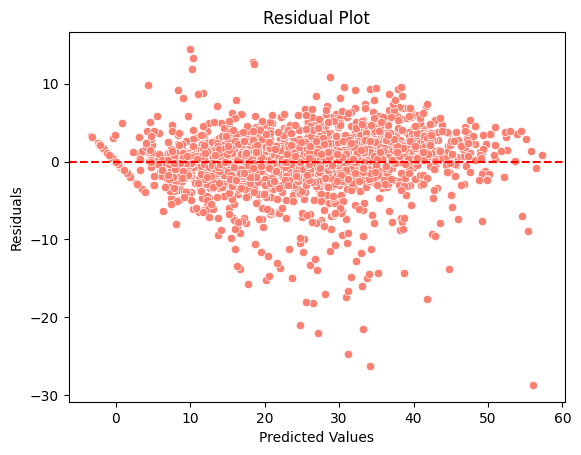

In [115]:
# Heteroscedasticity
residuals = y_test - y_pred_test_gs
sns.scatterplot(x=y_pred_test_gs, y=residuals,color='salmon')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

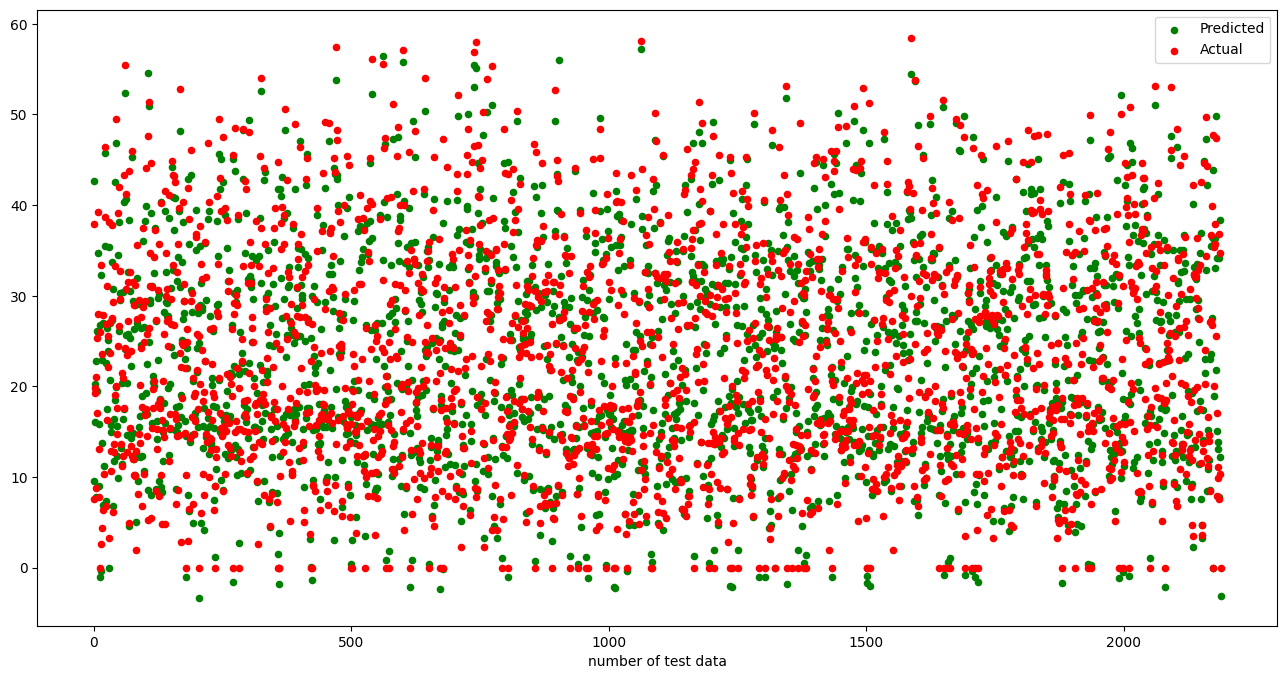

In [116]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_pred_test_gs)),y_pred_test_gs,s=20,c='green',label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='red', label='Actual')
plt.legend()
plt.xlabel('number of test data')
plt.show()

In [117]:
gs_optimal_model.feature_importances_

array([3.13994147e-01, 9.76728221e-03, 2.35249944e-02, 5.22353327e-02,
       1.17158340e-01, 1.57319748e-03, 7.22356157e-04, 7.17850547e-03,
       1.84438808e-02, 2.91921807e-02, 2.75642531e-02, 9.45723081e-03,
       4.16971864e-03, 1.07320926e-02, 8.72449043e-04, 3.96094946e-03,
       2.25461587e-03, 3.27893382e-04, 2.60593456e-04, 3.24438509e-04,
       5.26034804e-04, 1.88154805e-03, 1.03011454e-02, 2.90911366e-02,
       1.63398204e-02, 1.57459699e-02, 2.11182917e-02, 1.82846504e-02,
       4.97510524e-03, 4.25008176e-03, 7.99448601e-04, 1.63966359e-02,
       1.57513237e-03, 1.74239282e-01, 2.13217144e-04, 7.66986415e-04,
       2.37858665e-04, 1.05948734e-03, 3.25465926e-03, 2.64850920e-03,
       5.64159993e-03, 4.23303823e-04, 6.44866372e-03, 5.58390954e-03,
       7.69803968e-04, 2.37132664e-02])

In [118]:
imp = gs_optimal_model.feature_importances_

imp_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : imp}

imp_df = pd.DataFrame(imp_dict)

In [119]:
imp_df['Feature Importance'] = round(imp_df['Feature Importance'],2)

In [120]:
imp_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
33  Functioning_Day_Yes                0.17
4              Rainfall                0.12
3       Solar_Radiation                0.05
9                Hour_4                0.03
10               Hour_5                0.03
23              Hour_18                0.03
26              Hour_21                0.02
24              Hour_19                0.02
2            Visibility                0.02
31       Seasons_Winter                0.02
27              Hour_22                0.02
8                Hour_3                0.02
25              Hour_20                0.02
45            weekend_1                0.02
7                Hour_2                0.01
40              month_8                0.01
11               Hour_6                0.01
13               Hour_8                0.01
22              Hour_17                0.01
1            Wind_speed                0.01
42             month_10                0.01
43             month_11                0.01
41              month_9                0.00
6                Hour_1                0.00
39              month_7                0.00
38              month_6                0.00
44             month_12                0.00
37              month_5                0.00
36              month_4                0.00
35              month_3                0.00
34              month_2                0.00
15              Hour_10                0.00
32   Holiday_No Holiday                0.00
5              Snowfall                0.00
16              Hour_11                0.00
29       Seasons_Spring                0.00
28              Hour_23                0.00
12               Hour_7                0.00
14               Hour_9                0.00
21              Hour_16                0.00
20              Hour_15                0.00
19              Hour_14                0.00
18              Hour_13                0.00
17              Hour_12                0.00
30       Seasons_Summer                0.00

Text(0.5, 0, 'Relative Importance')

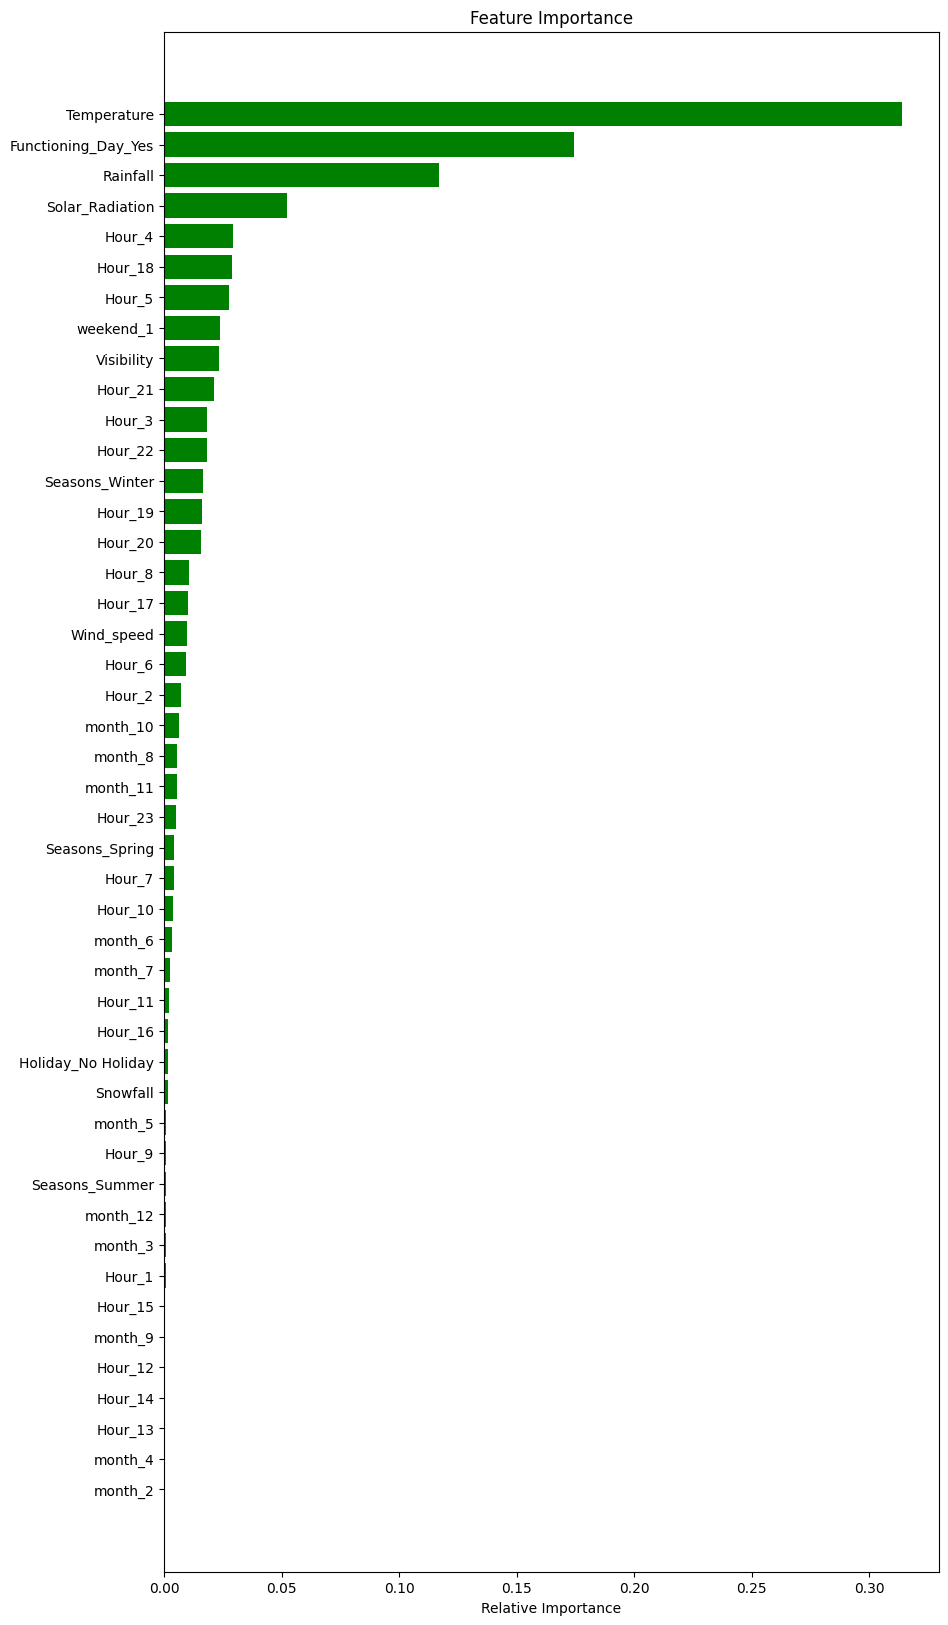

In [121]:
features = X_train.columns
imp1 = gs_optimal_model.feature_importances_
indices = np.argsort(imp1)
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp1[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')



# **Conclusion**

In our analysis, we began by conducting an exploratory data analysis (EDA) on all features in the dataset. We started by examining the dependent variable, 'Rented Bike Count,' and made necessary transformations to ensure its suitability for modeling. Moving on, we focused on the categorical variables and eliminated those with a dominant single class. For the numerical variables, we calculated correlations, studied their distributions, and analyzed their relationships with the dependent variable. Additionally, we removed numerical features mostly consisting of 0 values and performed one-hot encoding for the categorical variables.

Next, we implemented five machine learning algorithms: Linear Regression, Lasso, Ridge, Elastic Net, and Gradient Booster. Hyperparameter tuning was also conducted to optimize model performance. Our evaluation yielded the following findings:

In [122]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model   MAE    MSE  RMSE  R2_score  \
Training set 0               Linear Regression  4.55  36.49  6.04      0.76   
             1                Lasso Regression  4.57  37.03  6.09      0.76   
             2                Ridge Regression  4.55  36.49  6.04      0.76   
             3           Elasticnet Regression  4.62  37.42  6.12      0.76   
             4    Gradient Boosting Regression  3.43  21.35  4.62      0.86   
             5  Gradient Boosting GridSearchCV  1.98   8.98  3.00      0.94   
Test set     0               Linear Regression  4.56  37.49  6.12      0.76   
             1                Lasso Regression  4.62  38.60  6.21      0.75   
             2                Ridge Regression  4.56  37.49  6.12      0.76   
             3           Elasticnet Regression  4.67  39.03  6.25      0.75   
             4    Gradient Boosting Regression  3.71  24.20  4.92      0.85   
             5  Gradient Boosting GridSearchCV  2.43  13.42  3.66      0.91   

                Adjusted R2_score  
Training set 0               0.76  
             1               0.76  
             2               0.76  
             3               0.76  
             4               0.86  
             5               0.94  
Test set     0               0.76  
             1               0.75  
             2               0.76  
             3               0.75  
             4               0.84  
             5               0.91

* Linear Regression, Lasso Regression, Ridge Regression, and Elasticnet Regression show similar performance on both the training and test sets. They have comparable MAE, MSE, RMSE, R2 score, and adjusted R2 score values, indicating consistent predictive accuracy across the two datasets.

* Gradient Boosting Regression outperforms the other algorithms on the training set. It achieves significantly lower MAE, MSE, and RMSE values compared to the other models, suggesting better predictive accuracy in capturing the variation in the training data. It also exhibits a higher R2 score and adjusted R2 score, indicating a better fit to the training data.

* However, Gradient Boosting Regression shows slightly reduced performance on the test set compared to the training set. Although it still performs well and has a relatively low MAE, MSE, and RMSE, its R2 score and adjusted R2 score decrease slightly, indicating a slightly weaker fit to the test data. This suggests that the model may be slightly overfitting the training data.

* Gradient Boosting GridSearchCV performs the best overall on both the training and test sets. It achieves the lowest MAE, MSE, and RMSE values, indicating superior predictive accuracy and better capturing of variations in the target variable. It also demonstrates the highest R2 score and adjusted R2 score, implying the best fit to the data.

In summary, the Gradient Boosting GridSearchCV model stands out as the most effective algorithm for predicting the 'Rented Bike Count' based on the given evaluation metrics. It provides the lowest errors, highest R2 score, and adjusted R2 score, indicating its superior performance in capturing the underlying patterns in the dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***